**Note: Please use [Jupyter Notebook](https://jupyter.org/) for best viewing experience. Some things in the file does not work with Google Colab.**

# ***Emotion Recognition Using Speech***
---
### **An experimental study by** 
**Subodh Bijwe (2019AIM1011) and Gulshan Sharma (2019CSZ0004)**

**Abstract**: Recently, with availability of high computation capabilities and advancements in the area of machine learning, attention to the emotion recognition through speech signal research has been boosted in human machine interfaces. Various theoretical and experimental studies are governed till now, to identify the emotional state of a person through examining speech signals. Preparation of an appropriate dataset, selection of suitable and promising features, designing proper classification methods are  the main key issues of an speech emotion recognition system. This document demonstrates the collective work done by us to fullfill the CS-503 course project criteria. All experimentation is performed in a python 3.7 environment.

---

# Table of Contents
1. [**Introduction**](#Introduction)
* [**Emotions Modelling**](#Emotions-Modelling)
* [**Related Work**](#Related-Work)
* [**Methodology**](#Methodology)
    1. [**Datasets**](#Datasets)
        1. [**RAVDESS**](#A.-RAVDESS:)
        * [**SAVEE**](#B.-SAVEE:)
        * [**TESS**](#C.-TESS:)
    2. [**Libraries Used**](#2.-Libraries-Used)
    3. [**Our Approtch**](#Methodology-used)
        1. [**Exploring Data**](#Exploring-Data)
        * [**Defining Functions**](#Defining-Functions)
        * [**Augmentation Methods**](#Augmentation-Methods)
            1. **Static Noise**
            * **Shift**
            * **Pitch**
            * **Dynamic Change**
            * **Speed and Pitch**
        * [**Conductiong Experiments**](#Conducting-Experiments)
        * [**Printing Results**](#Printing-Results)
            1. **Validation accuracy and validation loss plots**
            2. **Accuracy on test data**
            3. **Precision**       
            4. **Recall**
            5. **F1-score** 
            6. **Support** 
            7. **Confusion Matrix**
* [**Experiments and Results**](#Experiments-and-Results)
    1. [**Test the models trained on RAVDESS on the same dataset (Randomized split)**](#Experiment-1:-Test-the-models-trained-on-RAVDESS-on-the-same-dataset-(Randomized-split))
    2. [**Test the models trained on RAVDESS on the combined dataset**](#Experiment-2:-Test-the-models-trained-on-RAVDESS-on-the-combined-dataset)
    3. [**Train the models on combined dataset and check for the performance on the same**](#Experiment-3:-Train-the-models-on-Combined-dataset-and-check-for-the-performance-on-the-same)
    4. [**Now we experiment with the combined data with some augmentation methods**](#Experiment-4:-Now-we-experiment-with-the-combined-data-with-some-augmentation-methods)
    5. [**Test the models trained on RAVDESS on the same dataset (Specified split)**](#Experiment--5:-Train-and-test-on-RAVDESS(Not-Randomized))
    6. [**Experiments with 2D CNN Architecture**](#Experiment-6:-Experiments-with-2D-CNN-Architecture)
* [**Discussions**](#Discussions)
* [**Summary**](#Summary)
* [**Future Scope**](#Future-Scope)
* [**References**](#References)
* [**Code**](#Code)

---

## **Introduction**

Recognition of human emotions has always been a topic of interest for data scientists. Multiple sources like facial expressions, movement of eyes, tone of speech can be used to detect emotions. We have chosen speech among these. However, humans also have habit of hiding their true emotions. This study does not consider that and believes humans always show their true emotions while speaking.

The idea behind this study is to see what, among the available methods are better for classification of emotions from audio files. Audio files are different than image files. It requires experienced person and cost to attach a categorizing label to an audio file after completely listening to it unlike images where it can be easily classified as dog or cat based on the what the image contains. And then using that data to train a model and see how it performs on unheard audio, that sparked our interest in this domain. 

In this study we have done multiple experiments and checked what settings perform better on unheard audio files. 

![Intro Image](images/intro_image.jpeg)
Image Credit: depositphotos


Back to [Table of Contents](#Table-of-Contents)

---

## **Emotions Modelling**


Modelling human emotions is a hard problem, Out of all the models proposed by various researchers, two methods are very popular for modelling emotions.
First approach is to label the emotions in discrete categories, like Joy, Sadness, Surprise, Anger, Love and Fear etc. Though this modelling method provides separate discrete target classes, the problem with this model is that a given expression/stimuli may consist of blended emotions and the model is not adequate to express. Second approach is to have higher dimensional continuous scales to categorize emotions. ie Instead of choosing discrete target classes to categorize emotions, impression of each stimulus is indicated on continuous scales. Some examples for these continuous scales are attention-rejection, pleasant-unpleasant, simple-complicated scales etc. Out of these many scales valence and arousal is most common and famous. Here in this scale, pleasantness and unpleasantness of a stimulus is represented by positive valence and negative valence values respectively. Arousal is the second dimension and it represents the activation level of the stimuli. Since both valence and arousal are continuous scales, hence we can represent different emotional levels on a two dimensional plane with arousal and valence axis. 



Back to [Table of Contents](#Table-of-Contents)

---

## **Related Work**

As the saying goes, 'standing of the shoulders of giants', we would like to appreciate the related work done by the following mentioned. Their work not only helped us in building these experiments but also gave us deep insights on the working of the data and laid a foundation on which our study stands.

*  Cao et al. [1] has proposed a ranking SVM method to solve the problem of binary classification for synthesize information about emotion recognition. This ranking strategy, treats data from every speech utterer as a seperate query then instruct SVM algorithms to mix all predictions from rankers to apply multi-class prediction. Ranking SVM approtch has two main advantages, first, for speaker-independent it obtains speaker specific data during training and testing steps. Second, Since each speaker can express mixture of multiple emotions, So this inturions is considered in this approtch to recognize the dominant emotion. It is observed that, this Ranking approach has achieved substantial gain in terms of accuracy compare to conventional SVM approtch.  

* Nwe  et  al. [2] has proposed a complete new system for emotion classification of utterance signals. Proposed system employ a short time log frequency power coefficients (LFPC) as a feature vector to characterize the speech signals. and discrete HMM is used as classifier. This method is able to classify the emotions into six different categories. To train and test this newly proposed system, Author has used his private dataset. LFPC coefficients are is compared with the MFCC coefficients and LPCC coefficients. Result of this experimentaion shows that model is able to achieve classification accuracy of 78% and 96% in average and best case respectively. Also, It is observed that LFPC coefficients as a feature is a better option as compared to the standard features used for emotion classification.

* Chen et al. [3]  has used three level speech emotion recognition method to classify various emotions from coarse to fine then Fisher rate is used to  select appropriate features. This output feature from fisher rate is used as a input parameters for a multi-level SVM classifier. After that principal component analysis (PCA) is employed to reduce the dimensionality of feature space. Furthermore artificial neural network (ANN) is used for classification  of four comparative experiments which include  Fisher + SVM,  PCA + SVM, Fisher + ANN and PCA + ANN. This experimentaion shows that dimension reduction Fisher is better than PCA for classification.

* Rong et al. [4] has proposed an ensemble random forest method with a high number of features for emotion recognition. Author has not referred any language, hence it remains an unclosed problem. This ensemble random forest on tree method is applied on a dataset cosistes of fewer instances but with high dimensional feature. This method achieved improvement on emotion recognition  rate when evaluated on a Chinese emotional speech dataset. Furthermore, It is observed that ensemble random forest on tree method performs better than popular feature reduction methods like PCA,  multi-dimensional scaling and  recently  developed ISOMap. Author has mentioned the best accuracy rate of 82.54% with 16 dimensional features in the female dataset, while 16% on 84 dimensional features is the worst case scenerio on natural data set.

* Wu et al. [5] has proposed a fusion-based method for speech emotion recognition. Author has employed acoustic-prosodic features and semantic labels on multiple classifier. Proposed fusion method consists of extracting acoustic-prosodic features first, Then three different types of base-level classifier are used. These classifiers are GMMs, SVMs, MLP and Meta decision trees. The maximum entropy model in the semantic labels method is used extract the the association information amoung the emotion association rules and emotion states in emotion recognition. Finally, the integrated information from the semantic labels based and acoustic-prosodic based models are utilized to define the emotion recognition outcome in the final state. This experimentation is done on a private dataset and it shows the performance based Accuracy parameter as follows. 80% on MDT archives, 80.92% on SL-based recognition archives, and 83.95% on the mixture of semantic labels based and acoustic-prosodic model.

* Narayanan [6] has proposed a domain-specific emotion recognition system using speech signals collected from the call centers. Author's main research focus is on detecting negative and non-negative emotions and using acoustic, lexical, and discourse features for emotion recognition. K-NN and linear discriminant classifiers are used and experimental results confirm that the best results  are obtained by combining both acoustic and language data. By combining three information sources together, classification accuracy is increased by 40.7% for males and 36.4% for females, instead of using single information source. This research tells combinig multiple information sources is better for a robust emotion recognition system.

* Yang & Lugger [7] has proposed a new set of harmony features used for emotion recognition in speech signals. These features are inspired from the psychoacoustic perception from music theory. Firstly calculating predicted pitch of a speech signals, then computing spherical autocorrelation of  pitch  histogram. Cause of a harmonic or inharmonic impression is computed by calculating the extent of dissimilarity two pitch durations. Bayesian classifier, with a Gaussian class-conditional likelihood is used in the classification step. Experimental result by using harmony features in Berlin emotion database indicates an improvement in average recognition rate by 2%. 


* This study is highly inspired by [Mitesh Puthran](https://github.com/MITESHPUTHRANNEU) and the research given in his [Speech Emotion Analyzer](https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer) repository. We tried to replicate the results but he however predicted the results of live voices. Due to lack of resources we were unable to do that which is why we decided to compare on data found in different datasets. It will be mentioned in the next section briefly.

* [Eu Jin Lok](https://www.kaggle.com/ejlok1) has also provided us with simple and easily understandable application of the same in [Audio Emotion Series](https://www.kaggle.com/ejlok1/audio-emotion-part-1-explore-data).

* [Speech Emotion Recognition with Convolutional Neural Network](https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3) by [Reza Chu](https://towardsdatascience.com/@rezachu) was also a part of our experiments.

* Last but not the least, we would like to thank the authors of the following datasets used in the experiments,
  1. [The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)](https://zenodo.org/record/1188976#.XsnXznUzbyt)
  2. [Surrey Audio-Visual Expressed Emotion (SAVEE) Database](http://kahlan.eps.surrey.ac.uk/savee/Database.html)
  3. [Toronto emotional speech set (TESS) ](https://tspace.library.utoronto.ca/handle/1807/24487)



Back to [Table of Contents](#Table-of-Contents)

---

## **Methodology** 
### **1. DataSets**
#### As mentioned above 3 different datasets were used for the experiments.
##### **A. RAVDESS**:  
The RAVDESS dataset is a collection of 7356 files. The database contains speech and songs by 24 actors (12 male and 12 female). Speech includes different emotions such as calm, happy, sad, angry, fearful, surprise, and disgust.
 Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression. All conditions are available in three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound).  Also, there are no song files for Actor_18.

* **Audio-only files**
##### Audio-only files of all actors (01-24) are available as two separate zip files (~200 MB each):

 * Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440. 
 * Song file (Audio_Song_Actors_01-24.zip, 198 MB) contains 1012 files: 44 trials per actor x 23 actors = 1012. We won't be using the song files, instead our work will revolve around the speech files.

* **File naming convention**

 Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

  * *Filename identifiers* 

    * Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
    * Vocal channel (01 = speech, 02 = song).
    * Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
    * Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
    * Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
    * Repetition (01 = 1st repetition, 02 = 2nd repetition).
    * Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

  * *Filename example:* 02-01-06-01-02-01-12.mp4 

    * Video-only (02)
    * Speech (01)
    * Fearful (06)
    * Normal intensity (01)
    * Statement "dogs" (02)
    * 1st Repetition (01)
    * 12th Actor (12) (Female, as the actor ID number is even.)

##### **B. SAVEE**: 
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman and studies of automatic emotion recognition tended to focus on recognizing these. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. 
 * This resulted in a total of 120 utterances per speaker, for example:
  * Common: She had your dark suit in greasy wash water all year.
  * Anger: Who authorized the unlimited expense account?
  * Disgust: Please take this dirty table cloth to the cleaners for me.
  * Fear: Call an ambulance for medical assistance.
  * Happiness: Those musicians harmonize marvelously.
  * Sadness: The prospect of cutting back spending is an unpleasant one for any  governor.
  * Surprise: The carpet cleaners shampooed our oriental rug.
  * Neutral: The best way to learn is to solve extra problems. 
 * The original SAVEE dataset has 4 speakers but we have bundled all of them into one single folder and thus the first 2 letter prefix of the filename represents the speaker initials. Eg. 'DC_d03.wav' is the 3rd disgust sentence uttered by the speaker DC. It's worth nothing that they are all male speakers only. To balance it out with we also used the TESS dataset which is just female only.

#### **C. TESS**:
 There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.
 The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format.





```
`# This is formatted as code`
```

Back to [Table of Contents](#Table-of-Contents)

---

## **2. Libraries Used**
  1. [Numpy](https://numpy.org/)
  2. [Pandas](https://pandas.pydata.org/)
  3. [Librosa](https://librosa.github.io/librosa/index.html)
  4. [Keras](https://keras.io/)
  5. [Sklearn](https://scikit-learn.org/stable/)
  6. [Matplotlib](https://matplotlib.org/)
  7. [Tensorflow](https://www.tensorflow.org/)


Back to [Table of Contents](#Table-of-Contents)

---

## **3. Our Approach**

* ### **Exploring Data**
  * Paths for each files are saved in their dataframes.
  * Some samples are tested for different emotioins, a waveplot is also plotted to visualise the pitch in each sample.
  * We also used [ MFCCs (Mel Frequency Cepstral Coefficients)](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum). The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.
* ### **Defining Functions**
  * We defined some functions to perform some basic tasks like train test splitting and data pre-processing.
  * Functions to build models are also defined which can be called in experiments.
  * After the model training phase we saved the models and to predict results from these models, we defined another function.

* ### **Augmentation Methods**
  ##### 1. Static Noise
    * Add static noise in the background of the audio file.
  
  ##### 2. Shift
    * Shift the audio file tiny bit to the left or right direction.
  
  ##### 3. Pitch
    * We use this method to stretch the audio, because of which the duration gets longer as well as the audio wave gets stretched too.
  
  ##### 4. Dynamic Change
    * We did some dynamic change in the original audio file.
  
  ##### 5. Speed and Pitch
    * As the name suggests, we change the speed and pitch at the same time.

* ### **Conducting Experiments**
  * For conducting each experiment a CNN model is used and is trained on specific data called as training data and tested on data called as testing data.
  * In experiments 1-5 an 1D CNN model is used and for 6th experiment 2D CNN model is used. These models can be easily found in the articles mentioned in the [Related Work](#Related-Work) section.
  * For extracting features from the audio files we have used two features from the librosa library. We consider these two as black box and focused on the features extracted after using them.
  * **Mel Scale:** The Mel scale relates perceived frequency, or pitch, of a pure tone to its actual measured frequency. Humans are much better at discerning small changes in pitch at low frequencies than they are at high frequencies. Incorporating this scale makes our features match more closely what humans hear. Noted from:- [MFCC Tutorial](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/)
  \begin{equation}
  M(f) = 1125 \ln(1 + \frac{f}{700})
  \end{equation}
    * First is [**MFCCs or Mel-Frequency Cepstral Coefficients**](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/). This shape determines what sound comes out. If we can determine the shape accurately, this should give us an accurate representation of the [*phoneme*](https://en.wikipedia.org/wiki/Phoneme) being produced. The shape of the vocal tract manifests itself in the envelope of the short time power spectrum, and the job of MFCCs is to accurately represent this envelope.
    * Second is [**Mel Spectogram**](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0). In short, Mel Spectrogram is a Spectrogram with the Mel Scale as its y axis.
    ![MFCC](images/mfcc.png)
    ![Mel Spectogram](images/mel_spec.png)
    * ***The above mentioned images are the MFCC and Mel Spectogram, respectively, of female actor no. 18 saying "Kids are sitting by the door".***
  * In each of the experiments normalization is performed on the data, learning rate is set to 0.00001 and loss is taken as categorical_crossentropy. 
  * We also have categorised the results we got into two major sub-experimentation trials:
      * We have combined the predictions based on **gender** and printed results for **gender classification** done by the models.
      * We have combined the predictions based on **emotions** and printed results for **emotion classification** done by the models.
  
* ### **Printing Results**
  * The results we have evaluated for all experiments are:
    1. **Validation accuracy and validation loss plots** are as the name suggests, plots which shows how the accuracy or loss (on the y-axis) varies as number of epochs (on the x-axis) increases.
    2. **Accuracy on test data** is the ratio of number of correct predictions to the total number of input samples.
    3. **Precision** is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”
        * According to our experiments if we consider a class $emotion_1$. The precision for this $emotion_1$ class is the number of correctly predicted $emotion_1$ audio files out of all predicted $emotion_1$ audio files.  
        \begin{equation}
        Precision_{emotion_i} = \frac{(True Positives)_{emotion_i}}{(True Positives + False Positives)_{emotion_1}}
        \end{equation}        
    4. **Recall** is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
       * According to our experiments if we consider a class $emotion_1$. The recall for this $emotion_1$ class is the number of correctly predicted $emotion_1$ audio files out of all actual $emotion_1$ audio files.  
        \begin{equation}
        Recall_{emotion_i} = \frac{(True Positives)_{emotion_i}}{(True Positives + False Negatives)_{emotion_1}}
        \end{equation} 
        ![Precision and Recall](images/precisionrecallpng.png)
        * Image source [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)
    5. **F1-score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
        \begin{equation}
        F1-score = \frac{2 \times (Precision_{emotion_i} \times Recall_{emotion_i})}{(Precision_{emotion_i} + Recall_{emotion_i})}
        \end{equation}
    6. **Support** is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.
    7. **Confusion Matrix** takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.
        * Example of Confusion Matrix:
        ![Confusion Matrix](images/confusion_matrix.png)
  * In almost all the experiments we have evaluated these parameters for the test data, test data classified based on genders and test data classified based on emotions. This gave us an insight on how the models are performing in classifying the unheard audio files into proper gender and proper emotions. 


**These values are generated by using ['classification_report'](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) metric of sklearn, [this](https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below.) and [this](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/#:~:text=F1%20Score,the%20precision%20and%20the%20recall.) blog clearly explains all of them.**


Back to [Table of Contents](#Table-of-Contents)

---

## **Experiments and Results**
The first five experiments are for 1D CNN architecture while the 6th(and last experiment) is for 2D CNN architecture. The data used for plotting the graphs is taken from the results in each section and is properly available in [**this link**](https://docs.google.com/spreadsheets/d/18Gh_aFSiZLq7jVgcI_hZvXOavR1h7GWa-w1c_DoxawI/edit#gid=0). Most of the graphs are self-evident, in the sense we can easily deduct how the models have performed on what dataset with how much of precision, recall and f1-score. The accuracies are mentioned seperately and gender and emotion based classification can be found in their particular section of the experiment in which the sub-experiment is conducted.
## 1. [Test the models trained on RAVDESS on the same dataset (Randomized split)](#Experiment-1:-Test-the-models-trained-on-RAVDESS-on-the-same-dataset-(Randomized-split))
 * In this experiment we trained both of our models on RAVDESS dataset. We plot both the Validation Accuracy and Validation Loss for both the models (This has been done after every model training step). 
 * We saved the models for future use and then load them for testing on the RAVDESS test set.   
    * Model 1 Results:
      * The accuracy is **48.26%**
    * Model 2 Results:
      * The accuracy is **38.54%**
      
 * The precision, f1-score, recall and confusion matrix can be found in respective sections.     
 ![Experiment 1: Precision, Recall, F1-Score](images/exp_01.png)
 * As further we explored the results we group together the results in two genders, male and female, and we found that the accuracy we get is **90.625%**. This means our model was capable of distinguishing between male and female voices very properly. 
 * And in another trial of exploration we look for emotion classification, where we got accuracy of **64.12%**.  
 * This concludes our first experiment.

---

## 2. [Test the models trained on RAVDESS on the combined dataset](#Experiment-2:-Test-the-models-trained-on-RAVDESS-on-the-combined-dataset)
 * Remember the models we have trained on the RAVDESS dataset? Now we test them on the combination of all the datset.
 * For this experiment we have combined the RAVDESS, SAVEE and TESS dataset.
 * We had not expected high results from this experiment as the training set is very small and does not represent whole distribution of dataset. Still for the sake of experimentation we see how the models performed.
    * Model 1 Results:
      * The accuracy is **15.21%**
    * Model 2 Results:
      * The accuracy is **15.97%** 
 * The precision, f1-score, recall and confusion matrix can be found in respective sections.
 ![Experiment 2: Precision, Recall, F1-Score](images/exp_2.png)
 * This concludes our second experiment.

---

## 3. [Train the models on combined dataset and check for the performance on the same](#Experiment-3:-Train-the-models-on-Combined-dataset-and-check-for-the-performance-on-the-same)
 * This is a major experiment because we will be using all the datasets to train the two models defined in earlier experiments and also for the testing purpose.
 * We have expected high accuracy from this experiment as now the training data has lots of variation and so does the testing data, and the models did perform well.
    * Model 1 Results:
      * The accuracy is **72.10%**
    * Model 2 Results:
      * The accuracy is **62.78%** 
 * The precision, f1-score, recall and confusion matrix can be found in respective sections.
 ![Experiment 3: Precision, Recall, F1-Score](images/exp_3.png)
 * As further we explored the results we group together the results in two genders, male and female, and we found that the accuracy we get is **97.52%**. This means our model was capable of distinguishing between male and female voices very properly. 
 * And in another trial of exploration we look for emotion classification, where we got accuracy of **64.12%**. 
 * This concludes our third experiment.

---

## 4. [Now we experiment with the combined data with some augmentation methods](#Experiment-4:-Now-we-experiment-with-the-combined-data-with-some-augmentation-methods)
 * Remember the augmentation methods we defined earlier? We used them in this experiment.
 * What we did was, we first explored the methods, saw how each of the methods affects a random sound file, and for preprocessing step we applied noise, speed and pitch to all the audio files in combined dataset.
 * So now we have a dataset with original sounds, sounds with noise and sounds with augmented speed and pitch.
 * We did the basic preprocessing like test-train splitting, normalization, expanding dimensions so we have data ready for our models. 
 * As in the previous experiment model 1 performed better so we choose only that model to work on in this experiment.
    * Model Results:
      * The accuracy is **74.66%**
 * The precision, f1-score, recall and confusion matrix can be found in respective sections.
 ![Experiment 4: Precision, Recall, F1-Score](images/exp_4.png)
 * As further we explored the results we group together the results in two genders, male and female, and we found that the accuracy we get is **97.20%**. This means our model was capable of distinguishing between male and female voices very properly. 
 * And in another trial of exploration we look for emotion classification, where we got accuracy of **75.53%**. 
 * This concludes our fourth experiment.

---

## 5. [Test the models trained on RAVDESS on the same dataset (Specified split)](#Experiment--5:-Train-and-test-on-RAVDESS(Not-Randomized))
 * This was more of a curiosity experiment. We wanted to see how will a model perform if we train it on some male and female sound files and test on other files. This experiment might look similar to the first experiment but it is different in a specific way.
 * In randomized case we had no choice on which data we are allocating for training and which for testing, but in this case we wanted to have that freedom, which is why we trained our model on first 20 actors in RAVDESS dataset and tested them on the remaining dataset.
 * RAVDESS is a dataset in which alternate actors are male and female, so 24 actors means 12 male actors and 12 female actors. We took 20 of them for training i.e. 10 male and 10 female and similarly 2 male and 2 female for testing purposes.
 * So we set aside the testing data i.e. the 4 actors(Actors 21-24).
 * We did some preprocessing on the training data and also added data with noise and changed pitch in along with the original dataset (We haven't done this in the first experiment).
    * Model Results:
      * The accuracy is **28.75%**
 ![Experiment 5: Precision, Recall, F1-Score](images/exp_5.png)
 * The precision, f1-score, recall and confusion matrix can be found in respective sections.  
 
 * As further we explored the results we group together the results in two genders, male and female, and we found that the accuracy we get is **81.66%**. This means our model was capable of distinguishing between male and female voices very properly. 
 * And in another trial of exploration we look for emotion classification, where we got accuracy of **32.91%**. 
 * This concludes our fifth experiment.

---

## 6. [Experiments with 2D CNN Architecture](#Experiment-6:-Experiments-with-2D-CNN-Architecture)
 * As mentioned earlier in this experiment we have explored the same performance measures on combined data with 2D CNN model.
 * This experiment is divided into 4 different sections. We will explore two different features provided by Librosa library, viz, mfcc and mel spectogram. In earlier experiments we only have used the mfcc feature, now we will use both with and without augmentation on 2D CNN.
  
  
  **Part: A**
  1. MFCC
    * Model Results:
        * The accuracy is **80.76%**
        * Gender classification accuracy is **99.49%**
  2. MFCC with Augmentation
    * Model Results:
        * The accuracy is **80.93%**
        * Gender classification accuracy is **99.23%**
  
![Part B: Precision](images/pa_pre.png)
![Part B: Recall](images/pa_rec_1.png)
![Part B: F1-Score](images/pa_f1_1.png)
  
  **Part: B**
  3. Mel Spectogram
    * Model Results:
        * The accuracy is **79.58%**
        * Gender classification accuracy is **98.89%**
  4. Mel Spectogram with Augmentation
    * Model Results:
        * The accuracy is **78.31%**
        * Gender classification accuracy is **96.86%**
![Part B: Precision](images/pb_pre.png)
![Part B: Recall](images/pb_rec.png)
![Part B: F1-Score](images/pb_f1.png)


 * In each of these experiments text and train split is 25:75 and the test and train samples are similar throughout the experiment.
 * The precision, f1-score, recall and confusion matrix can be found in respective sections along with the validitation loss and accuracy plots. 
 * This concludes our sixth and final experiment.



Back to [Table of Contents](#Table-of-Contents)

Back to [Experiments and Results](#Experiments-and-Results)

---

## **Discussions**

#### Some points were directly evident from the results we found in previous section:
1. Almost all the models were able to distinguish between male and female voices properly with high accuracy *(inferred from all [experiments](#Experiments-and-Results))*.
2. 2D CNN architecture gave better results in case of accuracy on test data as compared to 1D CNN architectures *(inferred by comparing [6th experiment to earlier ones](#Experiments-and-Results))*.
3. Randomized training data gave better results than not-randomized training data *(inferred from experiment [1st](1.-Test-the-models-trained-on-RAVDESS-on-the-same-dataset-(Randomized-split)) and [5th](#5.-Test-the-models-trained-on-RAVDESS-on-the-same-dataset-(Specified-split)))*.
4. Augmentation methods when applied to data gave better results in comparison to them being not applied *(inferred from experiment [3rd](#3.-Train-the-models-on-combined-dataset-and-check-for-the-performance-on-the-same) and [4th](#4.-Now-we-experiment-with-the-combined-data-with-some-augmentation-methods))*.
5. Librosa feature MFCC gives better result as compared to Mel Spectogram features *(inferred from [6th](#6.-Experiments-with-2D-CNN-Architecture) experiment)*.
6. Normalizing  the data was a wiser decision as it is proven to improve the accuracy and speed up the training process.
7. Even though most of the accuracies may not seem high, but even if we try to randomly guess, then the chances of it being correct is 1 out of 14 which is 7% so compared to that even 15% is huge improvement.
8. The 2D CNN takes in a 2D array of 30 MFCC bands by 216 audio length as input data. We can imagine it as a 30 x 216 pixel image. It has 4 convolution blocks of batch normalisation, max pooling and a dropout node. So your standard setup similar to VGG19, just not as deep. And we're using Adam for our optimiser.
9. We have shown the visualisation of the MFCC in few experiments, where it captures all the core information of the audio file into a single image. Well, if an audio information can be interpreted as an image, then can we can apply the same image recognition approaches like VGG19 or RESNET to them?
    * The answer is yes. And is suprisingly very fast and accurate. Its not as accurate as when applying RNN type models on the audio wave itself. But its very close to its accuracy potential, and heaps faster. There are some assumptions and limitations depending on use cases of course.
10. Data augmentation adds value in training the models and helps in increasing accuracy. 
11. We wanted to add some more datasets in the experiments like the [CREMA-D](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/) and [EmoDB](http://www.emodb.bilderbar.info/navi.html).
12. We can even add some more augmentation methods and also tune them to get optimal results.


#### **Some mistakes that were made:**
1. In experiment 5 we trained the model for 700 epochs, maybe that is the reason it has performed so poorly. This is because the accuracy it reached on the 700th epoch is 99.41% which means that the model was overiftted on the training data and was unable to classify the testing data that is the unheard audio files properly. 100 to 150 epochs are more than enough for the training process.
2. As we increased the number of experiments based on different ideas, we realized that the earlier functions are not generalized and so were not reused properly. We have defined functions properly in the last experiment though.
3. In the later sections, we haven't saved the models for future use. But that won't matter because we have set parameters in such a way that the models are easily reproducible.

Back to [Table of Contents](#Table-of-Contents)

---

## **Summary**

* We have conducted 6 experiments on various combination of 3 datasets. What we learned is that if we take just one dataset we have higher chances of running into problem of overfitting and so whilst their hold-out accuracy is high, they don't work well on new unseen data. This might be because the classifier is trained on the same dataset and given the similar circumstances that the dataset was obtained or produced, (eg. audio quality, speaker repetition, duration and sentence uttered).

* We have plotted precision, recall and f1-score graphs ([Experiments and Results](#Experiments-and-Results)) to compare between different models and different experimenting techniques (like the use of Augmentation and librosa features; MFCC and Mel Spectogram) implemented in the project. Most of the graphs are self-evident in the sense we can easily deduct how the model has performed in classifying different emotions.  

* The gender seperation turns out to be a crucial implementation in order to accurately classify emotions. Upon closer inspection of the confusion matrix, it seems that female tends to express emotions in a more, obvious manner, for the lack of a better word. Whilst males tend to be very placid or subtle. This is probably why we see the error rate amongst males are really high. For example, male happy and angry gets mixed up quite often.

* Our experiments showed that data augmentation does help improve the accuracy albeit slightly. Note that we only introduced two augmentation methods. Perhaps, if we include more it may make it more accurate. But there comes to a point where we have to consider the trade off between speed and accuracy.


Back to [Table of Contents](#Table-of-Contents)

---

## **Future Scope**

* There is a wide range of experiments that can be done with audio files. Multiple datasets are available for the same. Our study inculcates a small portion of them. We can try different combination of datasets, with and without augmentation and using different features of libraries like librosa.
* Most of the models did a pretty good job in differentiating genders and performed average when it comes to emotions. We can also implement various CNN models for this task. Also some benchmark models like RESNET or XCEPTION or VGG19 can be used for transfer learning.
* Last but not the least we can even use DCGANs for generating audios from the given datasets, that would be an interesting thing to do. This is because the MFCC and mel-spectogram we used are in form of images and DCGAN also uses images for learning.

Back to [Table of Contents](#Table-of-Contents)

---

## References

1. H. Cao, R. Verma, and A. Nenkova, “Speaker-sensitive emotion recognition via ranking: Studies on acted andspontaneous speech,” Comput. Speech Lang., vol. 28, no. 1, pp. 186–202, Jan. 2015.
2. T. L. Nwe, S. W. Foo, and L. C. De Silva, “Speech emotion recognition using hidden Markov models,” SpeechCommun., vol. 41, no. 4, pp. 603–623, Nov. 2003.
3. L. Chen, X. Mao, Y. Xue, and L. L. Cheng, “Speech emotion recognition: Features and classification models,”Digit. Signal Process., vol. 22, no. 6, pp. 1154–1160, Dec. 2012.
4. J. Rong, G. Li, and Y.-P. P. Chen, “Acoustic feature selection for automatic emotion recognition from speech,”Inf. Process. Manag., vol. 45, no. 3, pp. 315–328, May 2009.
5. C.-H.  Wu  and  W.-B.  Liang,  “Emotion  Recognition  of  Affective  Speech  Based  on  Multiple  Classifiers  UsingAcoustic-Prosodic Information and Semantic Labels,” IEEE Trans. Affect. Comput., vol. 2, no. 1, pp. 10–21,Jan. 2011.
6. S. S. Narayanan, “Toward detecting emotions in spoken dialogs,” IEEE Trans. Speech Audio Process., vol. 13,no. 2, pp. 293–303, Mar. 2005.
7. B.  Yang  and  M.  Lugger,  “Emotion  recognition  from  speech  signals  using  new  harmony  features,”  SignalProcessing, vol. 90, no. 5, pp. 1415–1423, May 2010.

Back to [Table of Contents](#Table-of-Contents)

---

## Code

## Importing Libraries

In [0]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import pandas as pd
import glob 
import os
import sys
import warnings
import json
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/home/subodh/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Exploring Data

In [0]:
RAV = "./big_size/"
SAVEE = "./SAVEE_used/"
TESS = "./TESS/TESS_data/"

In [0]:
dir_list_rav = os.listdir(RAV)
dir_list_savee = os.listdir(SAVEE)
dir_list_tess = os.listdir(TESS)

## A. RAVDESS

In [0]:
emotion = []
gender = []
path = []
for i in dir_list_rav:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        #print(i, f, part)
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_sad          96
male_angry          96
male_surprise       96
female_happy        96
male_disgust        96
female_fear         96
female_surprise     96
male_happy          96
male_fear           96
female_disgust      96
male_sad            96
female_angry        96
Name: labels, dtype: int64

## B. SAVEE

In [0]:
# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list_savee:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_disgust      60
male_happy        60
male_sad          60
male_angry        60
male_fear         60
male_surprise     60
Name: labels, dtype: int64

## C. TESS

In [0]:
path = []
emotion = []

for i in dir_list_tess:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_sad         400
female_neutral     400
female_angry       400
female_happy       400
female_fear        400
female_surprise    400
female_disgust     400
Name: labels, dtype: int64

## Let us take a look at our audio files
### We will first compare angry female and angry male for the same sentence

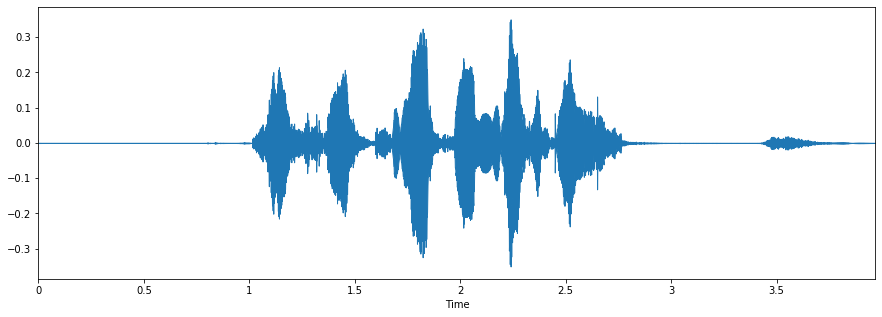

In [0]:
# Source: RAVDESS
# Gender: Female
# Emotion: Anger
path_female = "./big_size/Actor_08/03-01-05-02-01-01-08.wav"
data, sampling_rate = librosa.load(path_female)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
# Play
ipd.Audio(data, rate=sampling_rate)

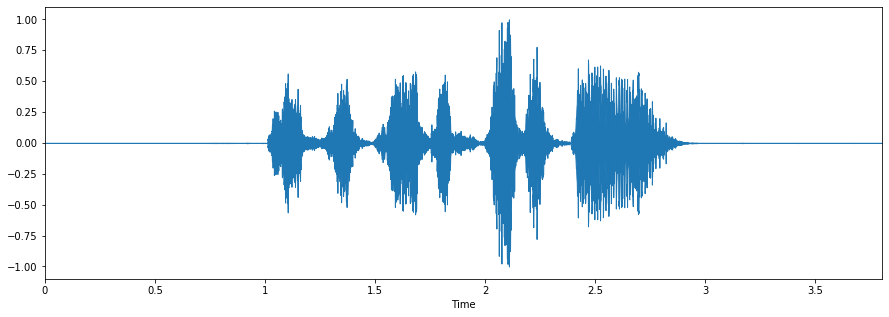

In [0]:
# Source: RAVDESS
# Gender: Male
# Emotion: Anger
path_male = "./big_size/Actor_09/03-01-05-02-01-01-09.wav"
data, sampling_rate = librosa.load(path_male)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
# Play
ipd.Audio(data, rate=sampling_rate)

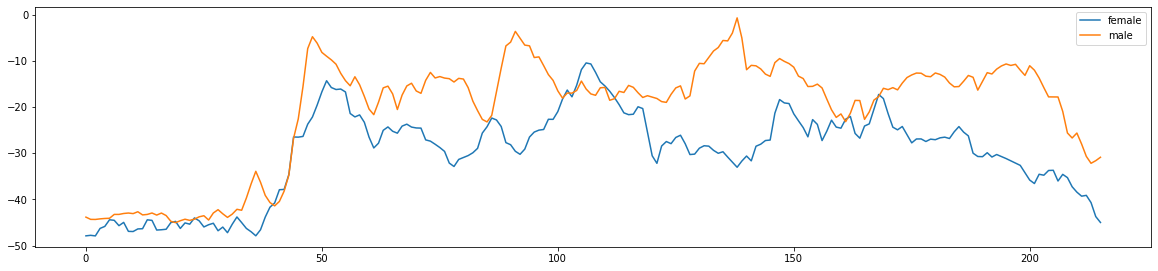

In [0]:
X, sample_rate = librosa.load(path_female, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

X, sample_rate = librosa.load(path_male, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()
plt.show()

### Now we will compare happy male and happy female for the same sentence

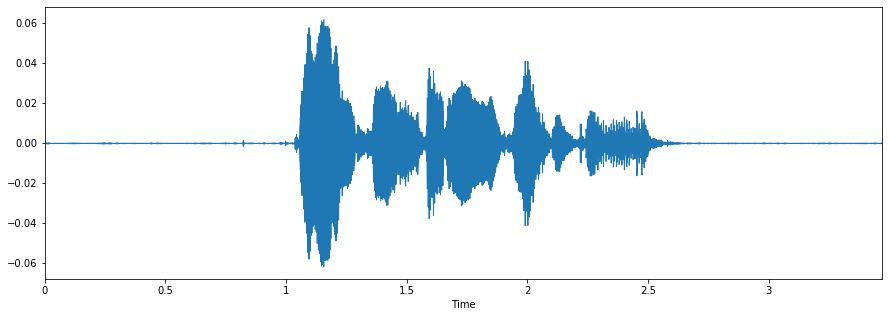

In [0]:
# Source: RAVDESS
# Gender: Female
# Emotion: Happy
path_female = "./big_size/Actor_08/03-01-03-01-02-01-08.wav"
data, sampling_rate = librosa.load(path_female)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
# Play
ipd.Audio(data, rate=sampling_rate)

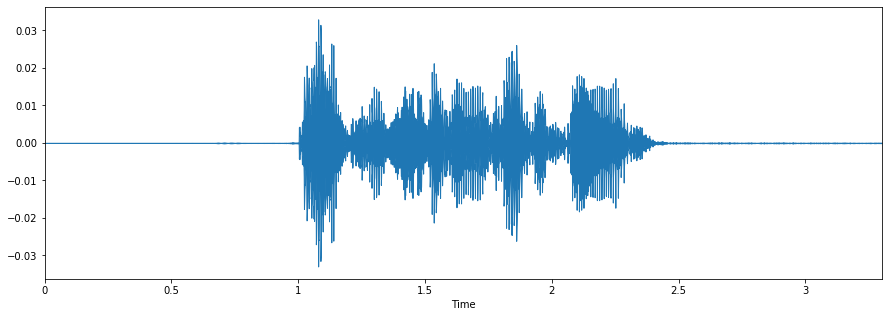

In [0]:
# Source: RAVDESS
# Gender: Male
# Emotion: Happy
path_male = "./big_size/Actor_09/03-01-03-01-02-01-09.wav"
data, sampling_rate = librosa.load(path_male)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
# Play
ipd.Audio(data, rate=sampling_rate)

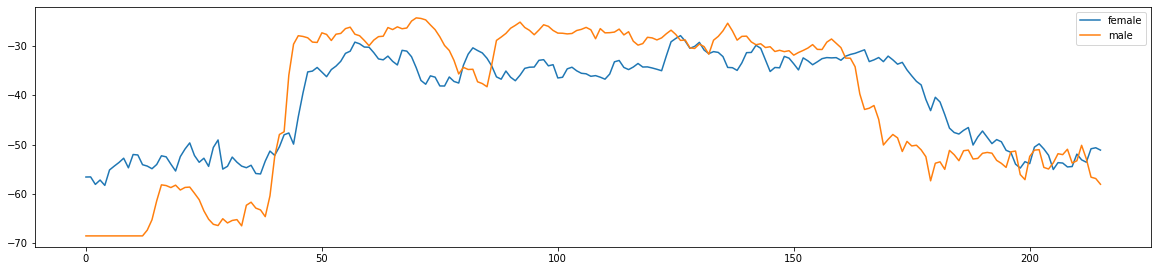

In [0]:
X, sample_rate = librosa.load(path_female, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

X, sample_rate = librosa.load(path_male, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()
plt.show()

### We will save everything for future use 

In [0]:
df_rav = pd.concat([RAV_df], axis = 0)
df_savee = pd.concat([SAVEE_df], axis = 0)
df_tess = pd.concat([TESS_df], axis = 0)
df_combined = pd.concat([SAVEE_df, RAV_df, TESS_df], axis = 0)
print("RAVDESS   : \n",df_rav.labels.value_counts())
print("\nSAVEE   : \n",df_savee.labels.value_counts())
print("\nTESS    : \n",df_tess.labels.value_counts())
print("\nCOMBINED: \n",df_combined.labels.value_counts())

df_rav.to_csv("Data_rav.csv",index=False)
df_savee.to_csv("Data_savee.csv",index=False)
df_tess.to_csv("Data_tess.csv",index=False)
df_combined.to_csv("Data_combined.csv",index=False)


RAVDESS   : 
 male_neutral       144
female_neutral     144
female_sad          96
male_angry          96
male_surprise       96
female_happy        96
male_disgust        96
female_fear         96
female_surprise     96
male_happy          96
male_fear           96
female_disgust      96
male_sad            96
female_angry        96
Name: labels, dtype: int64

SAVEE   : 
 male_neutral     120
male_disgust      60
male_happy        60
male_sad          60
male_angry        60
male_fear         60
male_surprise     60
Name: labels, dtype: int64

TESS    : 
 female_sad         400
female_neutral     400
female_angry       400
female_happy       400
female_fear        400
female_surprise    400
female_disgust     400
Name: labels, dtype: int64

COMBINED: 
 female_neutral     544
female_sad         496
female_angry       496
female_happy       496
female_fear        496
female_surprise    496
female_disgust     496
male_neutral       264
male_surprise      156
male_disgust       156
male_a

'\ndf_rav.to_csv("/content/drive/My Drive/Project/project_data/Data_rav.csv",index=False)\ndf_savee.to_csv("/content/drive/My Drive/Project/project_data/Data_savee.csv",index=False)\ndf_tess.to_csv("/content/drive/My Drive/Project/project_data/Data_tess.csv",index=False)\ndf_combined.to_csv("/content/drive/My Drive/Project/project_data/Data_combined.csv",index=False)\n'

In [0]:
rav_data_path = 'Data_rav.csv'
savee_data_path = 'Data_savee.csv'
tess_data_path = 'Data_tess.csv'
combined_data_path = 'Data_combined.csv'

#### Data Exploration Ends Here


## Required functions for data processing

In [0]:
def read_dataset(filepath):
    return pd.read_csv(filepath)#data_set


### Transforming the audio files in dataframes using librosa and mfcc

In [0]:
def create_feature_dataframe(data_set):
    df = pd.DataFrame(columns=['feature'])

    counter = 0
    for index, path in enumerate(data_set.path):
        X, sample_rate = librosa.load(path, res_type = 'kaiser_fast'
                                      ,duration=2.5
                                      ,sr=44100
                                      ,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 13), axis = 0)
        df.loc[counter] = [mfccs]
        counter += 1
    df = pd.concat([data_set, pd.DataFrame(df['feature'].values.tolist())],axis=1)
    df = df.fillna(0)
    return df
rav_df = create_feature_dataframe(read_dataset(rav_data_path))
savee_df = create_feature_dataframe(read_dataset(savee_data_path))
tess_df = create_feature_dataframe(read_dataset(tess_data_path))
combined_df = create_feature_dataframe(read_dataset(combined_data_path))
rav_df.head()

labels source                      path          0          1  \
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav -30.205614 -28.294016   
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav -40.303398 -37.919300   
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav -21.392101 -21.662266   
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav -24.900761 -24.354008   
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav -35.302341 -35.131142   

           2          3          4          5          6  ...        206  \
0 -27.909389 -28.509830 -28.120195 -28.570707 -29.546034  ...   0.000000   
1 -36.645100 -28.010498 -24.288029 -22.791922 -23.459490  ...   0.000000   
2 -22.259338 -24.444984 -23.050682 -23.140684 -22.903954  ... -22.763048   
3 -23.842062 -23.961361 -21.653095 -21.758453 -23.224234  ... -25.985544   
4 -36.651817 -40.392941 -40.899864 -39.890297 -37.871014  ... -38.050453   

         207        208        209        210        211        212  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2 -21.701115 -11.972590  -9.322908 -10.145143 -12.772147 -14.352438   
3 -19.891569 -15.183666 -13.054301 -12.797897 -11.673220  -9.116754   
4 -36.393749 -36.336716 -37.973526 -32.837669 -29.188053 -29.468193   

         213        214        215  
0   0.000000   0.000000   0.000000  
1   0.000000   0.000000   0.000000  
2 -16.328117 -12.141912  -6.584519  
3  -8.331745  -8.620239  -7.165553  
4 -31.124041 -26.687956 -22.051907  

[5 rows x 219 columns]

In [0]:
tess_df.head()

labels source                                               path  \
0  female_neutral   TESS   ./TESS/TESS_data/OAF_neutral/OAF_red_neutral.wav   
1  female_neutral   TESS  ./TESS/TESS_data/OAF_neutral/OAF_thought_neutr...   
2  female_neutral   TESS  ./TESS/TESS_data/OAF_neutral/OAF_note_neutral.wav   
3  female_neutral   TESS  ./TESS/TESS_data/OAF_neutral/OAF_date_neutral.wav   
4  female_neutral   TESS  ./TESS/TESS_data/OAF_neutral/OAF_life_neutral.wav   

           0          1          2          3          4          5  \
0 -27.531227 -27.284294 -28.146057 -27.797749 -27.840431 -28.782686   
1 -15.580937 -18.178825 -27.634718 -26.854889 -26.591505 -25.873421   
2 -15.811186 -19.120970 -26.876249 -27.312294 -28.224232 -27.710793   
3 -19.699177 -21.673155 -26.733738 -27.016909 -27.891336 -27.544559   
4 -19.158430 -21.439772 -27.321255 -26.996880 -27.611162 -26.968708   

           6  ...  205  206  207  208  209  210  211  212  213  214  
0 -29.777445  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1 -26.057098  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2 -26.631382  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3 -27.069057  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4 -26.897402  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 218 columns]

In [0]:
combined_df.head()

labels source                      path          0          1  \
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav -30.205614 -28.294016   
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav -40.303398 -37.919300   
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav -21.392101 -21.662266   
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav -24.900761 -24.354008   
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav -35.302341 -35.131142   

           2          3          4          5          6  ...        206  \
0 -27.909389 -28.509830 -28.120195 -28.570707 -29.546034  ...   0.000000   
1 -36.645100 -28.010498 -24.288029 -22.791922 -23.459490  ...   0.000000   
2 -22.259338 -24.444984 -23.050682 -23.140684 -22.903954  ... -22.763048   
3 -23.842062 -23.961361 -21.653095 -21.758453 -23.224234  ... -25.985544   
4 -36.651817 -40.392941 -40.899864 -39.890297 -37.871014  ... -38.050453   

         207        208        209        210        211        212  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2 -21.701115 -11.972590  -9.322908 -10.145143 -12.772147 -14.352438   
3 -19.891569 -15.183666 -13.054301 -12.797897 -11.673220  -9.116754   
4 -36.393749 -36.336716 -37.973526 -32.837669 -29.188053 -29.468193   

         213        214        215  
0   0.000000   0.000000   0.000000  
1   0.000000   0.000000   0.000000  
2 -16.328117 -12.141912  -6.584519  
3  -8.331745  -8.620239  -7.165553  
4 -31.124041 -26.687956 -22.051907  

[5 rows x 219 columns]

## Test Train Split

In [0]:
# Train, Test split and Normalization

def test_train_split(df, fraction = 0.25):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['path', 'labels','source'], axis = 1)
                                                    , df.labels
                                                    , test_size = fraction
                                                    , shuffle = True
                                                    , random_state = 42)
    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, y_train, X_test, y_test

### Following function process data and returns the test and train data and labels

In [0]:
# Lets do few preparation steps to get it into the correct format for Keras 
def process_data(df, fraction):
    X_train, y_train, X_test, y_test = test_train_split(df, fraction)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # expand dimensions
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
        
    # one hot encode the target 
    lb = LabelEncoder()
    y_train = np_utils.to_categorical(lb.fit_transform(y_train))
    y_test = np_utils.to_categorical(lb.fit_transform(y_test))

    return X_train, y_train, X_test, y_test, lb

X_train, y_train, X_test, y_test, labels = process_data(rav_df, 0.2)

In [0]:
labels.classes_

array(['female_angry', 'female_disgust', 'female_fear', 'female_happy',
       'female_neutral', 'female_sad', 'female_surprise', 'male_angry',
       'male_disgust', 'male_fear', 'male_happy', 'male_neutral',
       'male_sad', 'male_surprise'], dtype=object)

In [0]:
## Save the labels
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(labels, outfile)
outfile.close()

In [0]:
X_train.shape

(1152, 216, 1)

In [0]:
X_test.shape

(288, 216, 1)

### We now define two of our models that we will work with throughout the experiments

In [0]:
def build_model_1():
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(14)) # Target class number
    model.add(Activation('softmax'))
    model.summary()
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)
    return model

In [0]:
from keras import regularizers
def build_model_2():
    model = Sequential()
    model.add(Conv1D(128, 5, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5, padding='same'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 5, padding='same'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(14))
    model.add(Activation('softmax'))
    # opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    # opt = keras.optimizers.Adam(lr=0.0001)
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    tf.keras.utils.plot_model(model, to_file='model_2.png', show_shapes=True, show_layer_names=True)
    return model

### Training Model 1 on RAVDESS train data

In [0]:
model_1 = build_model_1()
model_1_history=model_1.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_10 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_3 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_11 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 256)          

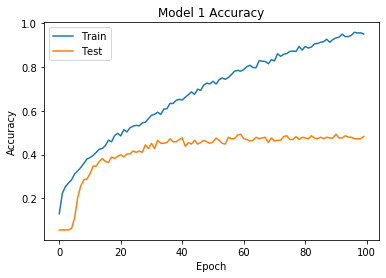

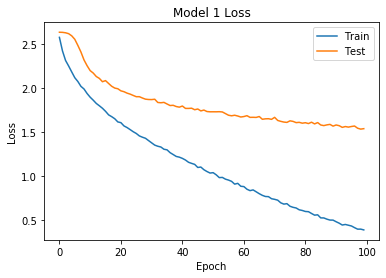

In [0]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
plt.plot(model_1_history.history['loss'])
plt.plot(model_1_history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Save model and weights
model_name = 'Model_1.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model_1.to_json()
with open("model_1_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/subodh/Second Semester/ML/Random Project/Audio/saved_models/Model_1.h5 


### Training Model 2 on RAVDESS train data

In [0]:
model_2 = build_model_2()
model_2_history=model_2.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 216, 128)          768       
_________________________________________________________________
activation_33 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 216, 128)          82048     
_________________________________________________________________
activation_34 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 27, 128)         

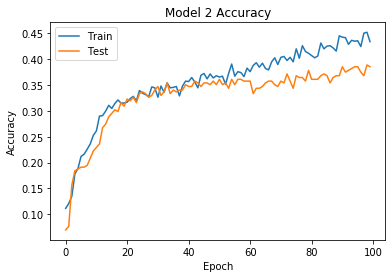

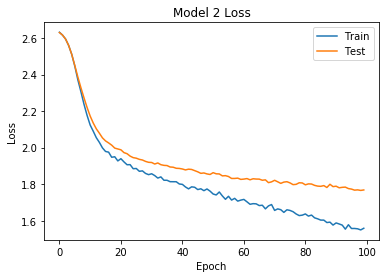

In [0]:
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
plt.plot(model_2_history.history['loss'])
plt.plot(model_2_history.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Save model and weights
model_name = 'Model_2.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_2.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model_2.to_json()
with open("model_2_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/subodh/Second Semester/ML/Random Project/Audio/saved_models/Model_2.h5 


## Confusion Matrix

In [0]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (15,15), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
        bottom, top = heatmap.get_ylim()
        heatmap.set_ylim(bottom + 0.5, top - 0.5)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

# [Experiment 1: Test the models trained on RAVDESS on the same dataset (Randomized split)](#experiment-1)

Back to [Experiments and Results](#Experiments-and-Results)

## Load from file and print results

Loaded model from disk
accuracy: 48.26%
288/288 [==============================] - 0s 2ms/step
       actualvalues predictedvalues
170   male_surprise      male_happy
171    male_neutral    male_neutral
172    female_angry    female_angry
173      female_sad      female_sad
174   male_surprise        male_sad
175  female_neutral  female_neutral
176      male_happy      male_happy
177    male_neutral    male_neutral
178    female_angry    female_angry
179    female_angry  female_disgust
0.4826388888888889
                 precision    recall  f1-score   support

   female_angry       0.50      0.56      0.53        18
 female_disgust       0.47      0.38      0.42        21
    female_fear       0.40      0.38      0.39        16
   female_happy       0.45      0.47      0.46        19
 female_neutral       0.58      0.88      0.70        33
     female_sad       0.70      0.35      0.47        20
female_surprise       0.62      0.72      0.67        18
     male_angry       0.59      0

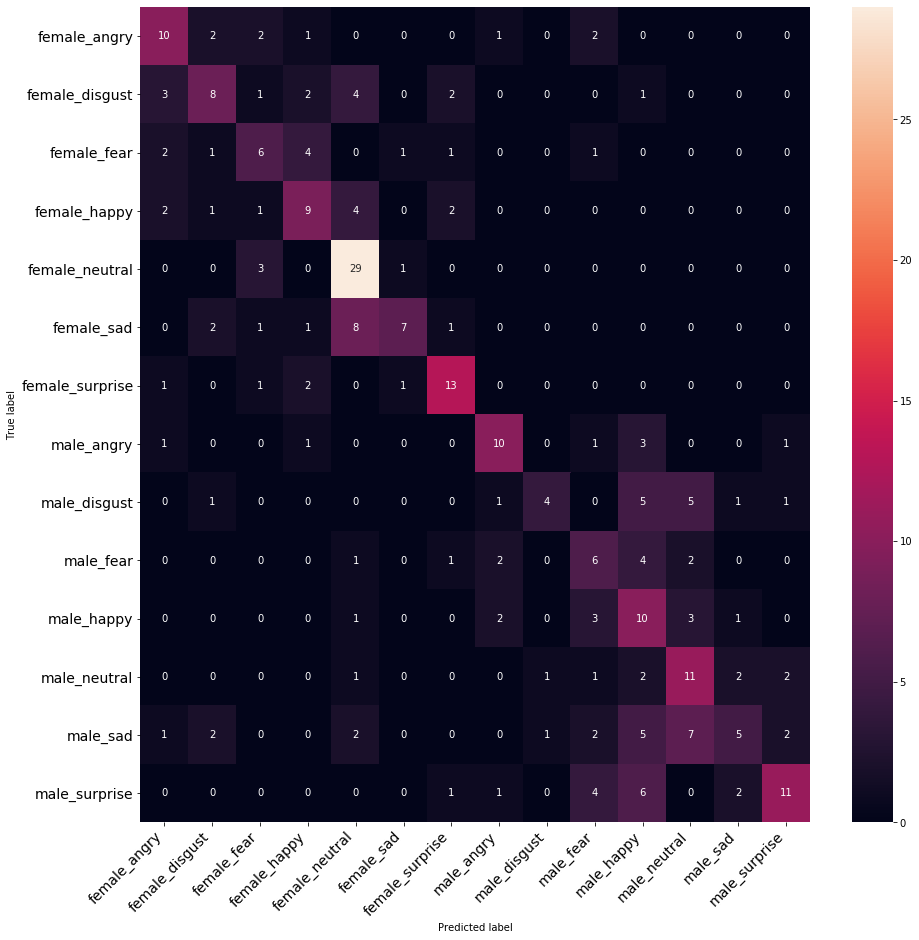

In [0]:
def load_and_print_results(filename, json_filename):
    # loading json and model architecture 
    json_file = open(json_filename, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("saved_models/" + filename)
    print("Loaded model from disk")

    # Keras optimiser
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    score = loaded_model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


    #print(labels.classes_)
    preds = loaded_model.predict(X_test, batch_size = 16, verbose = 1)
    preds = preds.argmax(axis = 1)
    # predictions 
    preds = preds.astype(int).flatten()
    preds = (labels.inverse_transform((preds)))
    preds = pd.DataFrame({'predictedvalues': preds})

    # Actual labels
    actual=y_test.argmax(axis=1)
    actual = actual.astype(int).flatten()
    actual = (labels.inverse_transform((actual)))
    actual = pd.DataFrame({'actualvalues': actual})

    # Lets combined both of them into a single dataframe
    rav_finaldf = actual.join(preds)
    print(rav_finaldf[170:180])
    rav_finaldf.to_csv('Predictions.csv', index = False)
    rav_finaldf.groupby('predictedvalues').count()


    rav_finaldf = pd.read_csv('Predictions.csv')
    classes = rav_finaldf.actualvalues.unique()
    classes.sort()

    c = confusion_matrix(rav_finaldf.actualvalues, rav_finaldf.predictedvalues)
    print(accuracy_score(rav_finaldf.actualvalues, rav_finaldf.predictedvalues))
    print_confusion_matrix(c, class_names = classes)

    classes = rav_finaldf.actualvalues.unique()
    classes.sort()
    print(classification_report(rav_finaldf.actualvalues, rav_finaldf.predictedvalues, target_names=classes))
    
load_and_print_results('Model_1.h5', 'model_1_json.json')

Loaded model from disk
accuracy: 38.54%
288/288 [==============================] - 0s 487us/step
       actualvalues  predictedvalues
170   male_surprise       male_angry
171    male_neutral     male_disgust
172    female_angry  female_surprise
173      female_sad   female_disgust
174   male_surprise     female_angry
175  female_neutral   female_neutral
176      male_happy       male_angry
177    male_neutral       male_happy
178    female_angry     female_angry
179    female_angry     female_angry
0.3854166666666667
                 precision    recall  f1-score   support

   female_angry       0.33      0.44      0.38        18
 female_disgust       0.42      0.38      0.40        21
    female_fear       0.30      0.44      0.36        16
   female_happy       0.42      0.26      0.32        19
 female_neutral       0.57      0.61      0.59        33
     female_sad       0.53      0.40      0.46        20
female_surprise       0.35      0.67      0.46        18
     male_angry     

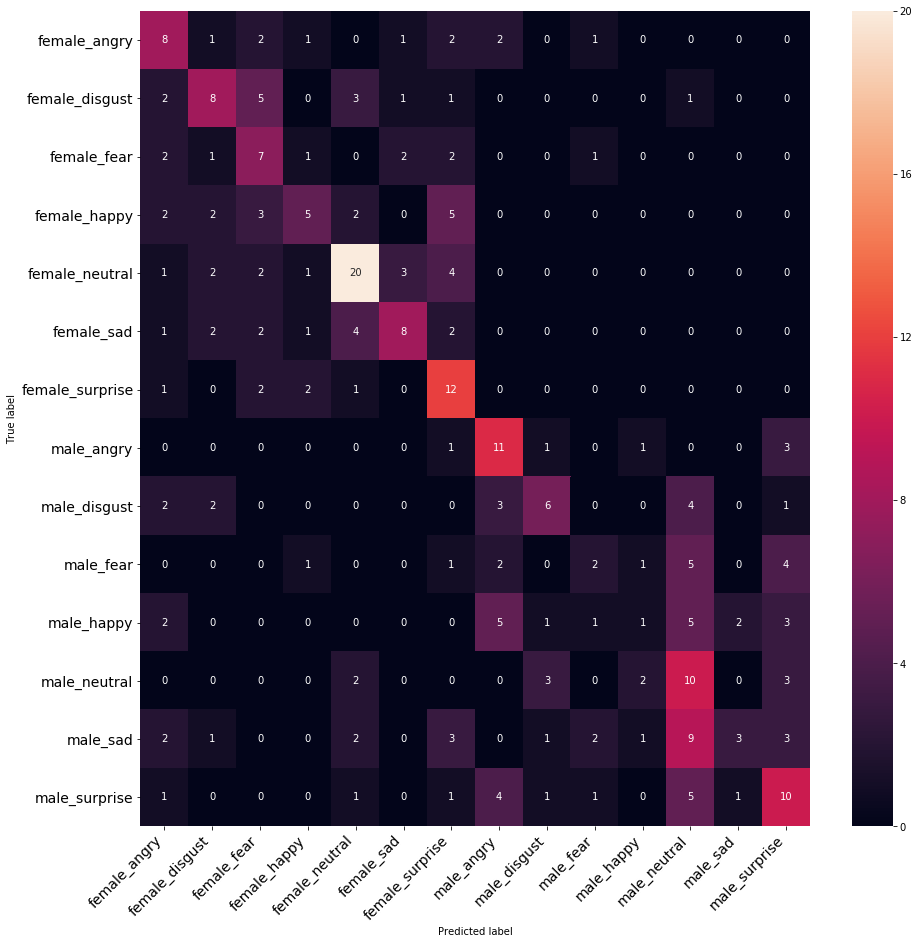

In [0]:
load_and_print_results('Model_2.h5', 'model_2_json.json')

#### As it can be easily seen, both the models do not perform very well when we train and test them on RAVDESS dataset. We will explore the gender based and emotion based results in the following cells. After that we will move on the testing to combined dataset and check the performance there.

## So, let's group the gender and check for the results

0.90625
              precision    recall  f1-score   support

      female       0.86      0.97      0.91       145
        male       0.96      0.85      0.90       143

    accuracy                           0.91       288
   macro avg       0.91      0.91      0.91       288
weighted avg       0.91      0.91      0.91       288



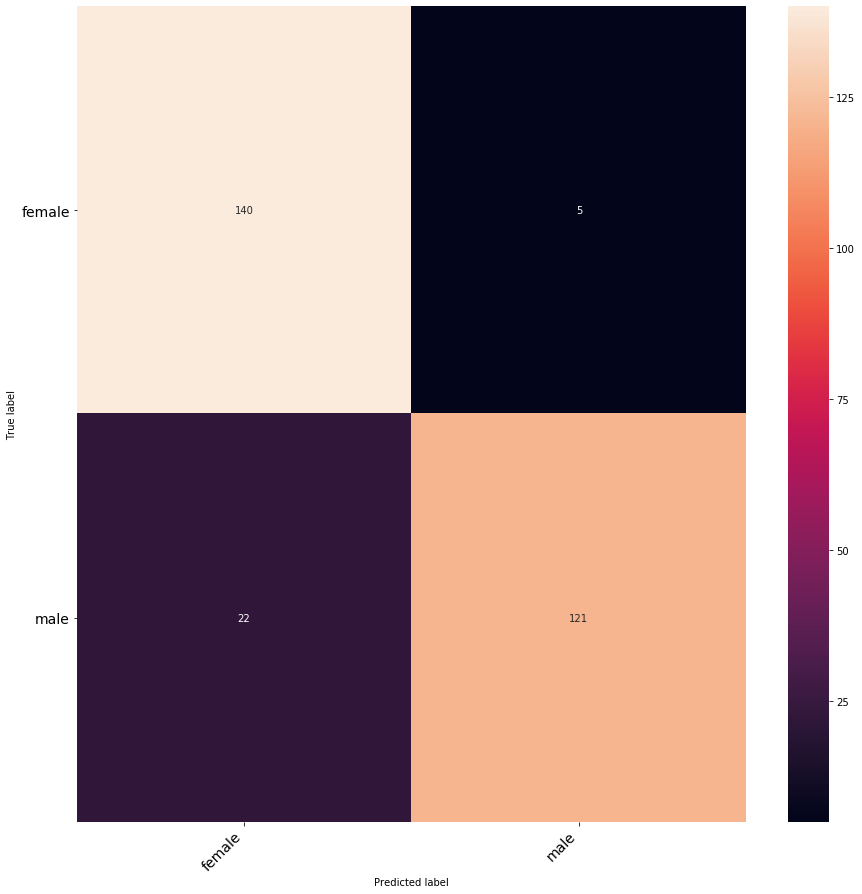

In [0]:
modidf = rav_finaldf
modidf['actualvalues'] = rav_finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = rav_finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

## And now, let's group together the emotions and look for the performance

0.6412429378531074
              precision    recall  f1-score   support

       angry       0.63      0.59      0.61       207
     disgust       0.73      0.71      0.72       202
        fear       0.56      0.53      0.55       208
       happy       0.69      0.58      0.63       195
     neutral       0.58      0.75      0.66       240
         sad       0.67      0.64      0.65       176
    surprise       0.68      0.68      0.68       188

    accuracy                           0.64      1416
   macro avg       0.65      0.64      0.64      1416
weighted avg       0.64      0.64      0.64      1416



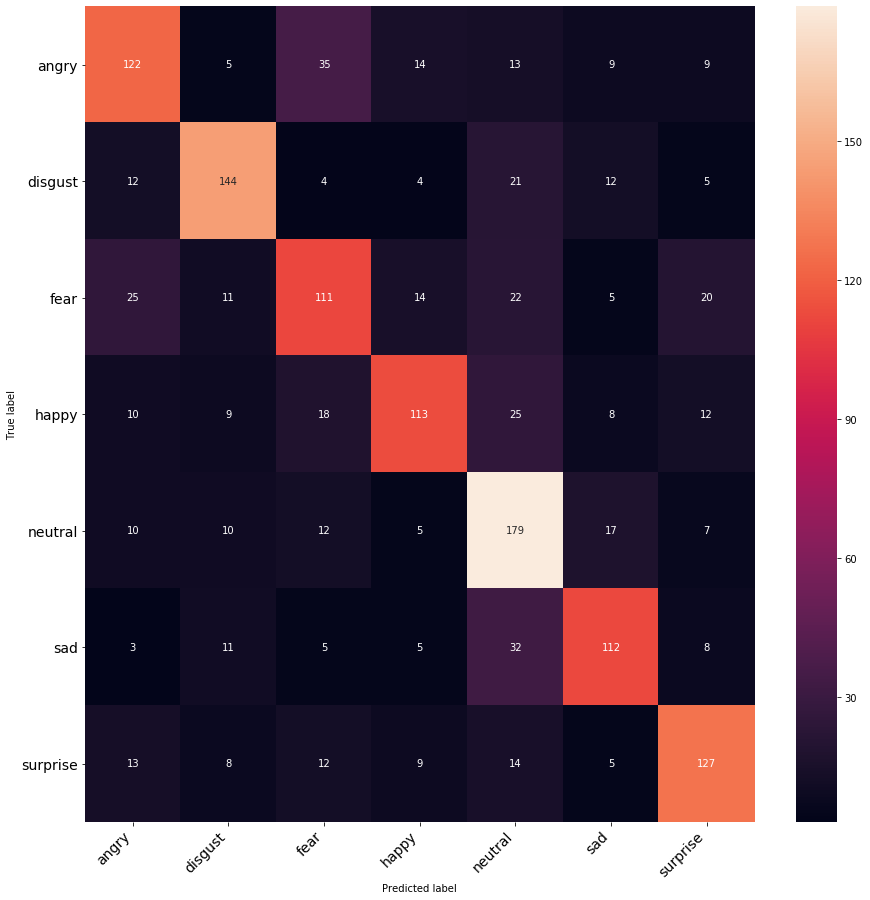

In [0]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))


# [Experiment 2: Test the models trained on RAVDESS on the combined dataset](#experiment-2) 

Back to [Experiments and Results](#Experiments-and-Results)

## Now we repeat the whole process for combined dataset


In [0]:
com = combined_df

X_test = com.drop(['path', 'labels','source'], axis=1)
y_test = com.labels
mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)
X_test = (X_test - mean)/std
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = np_utils.to_categorical(labels.fit_transform(y_test))
X_test = np.expand_dims(X_test, axis=2)

X_test.shape
#print(com)

(4720, 216, 1)

In [0]:
# loading json and model architecture 
def load_and_predict_com(filename, json_filename):
    json_file = open(json_filename, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("saved_models/" + filename)
    print("Loaded model from disk")

    # Keras optimiser
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    score = loaded_model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


    #print(labels.classes_)
    preds = loaded_model.predict(X_test, batch_size = 16, verbose = 1)
    preds = preds.argmax(axis = 1)
    # predictions 
    preds = preds.astype(int).flatten()
    preds = (labels.inverse_transform((preds)))
    preds = pd.DataFrame({'predictedvalues': preds})

    # Actual labels
    actual = y_test.argmax(axis=1)
    actual = actual.astype(int).flatten()
    actual = (labels.inverse_transform((actual)))
    actual = pd.DataFrame({'actualvalues': actual})

    # Lets combined both of them into a single dataframe
    com_ = actual.join(preds)
    print(com_[170:180])
    com_.to_csv('Predictions_com.csv', index = False)
    com_.groupby('predictedvalues').count()


    com_ = pd.read_csv('Predictions_com.csv')
    classes = com_.actualvalues.unique()
    classes.sort()

    c = confusion_matrix(com_.actualvalues, com_.predictedvalues)
    print(accuracy_score(com_.actualvalues, com_.predictedvalues))
    print_confusion_matrix(c, class_names = classes)

    classes = com_.actualvalues.unique()
    classes.sort()
    print(classification_report(com_.actualvalues, com_.predictedvalues, target_names=classes))


Loaded model from disk
accuracy: 15.21%
4720/4720 [==============================] - 7s 1ms/step
      actualvalues  predictedvalues
170  male_surprise        male_fear
171   male_disgust        male_fear
172   male_neutral     female_happy
173  male_surprise  female_surprise
174     male_happy        male_fear
175       male_sad       male_happy
176      male_fear        male_fear
177       male_sad   female_disgust
178   male_neutral         male_sad
179     male_angry        male_fear
0.1521186440677966
                 precision    recall  f1-score   support

   female_angry       0.11      0.10      0.10       496
 female_disgust       0.22      0.11      0.15       496
    female_fear       0.53      0.02      0.03       496
   female_happy       0.27      0.19      0.22       496
 female_neutral       0.23      0.29      0.26       544
     female_sad       0.33      0.01      0.01       496
female_surprise       0.26      0.25      0.26       496
     male_angry       0.00     

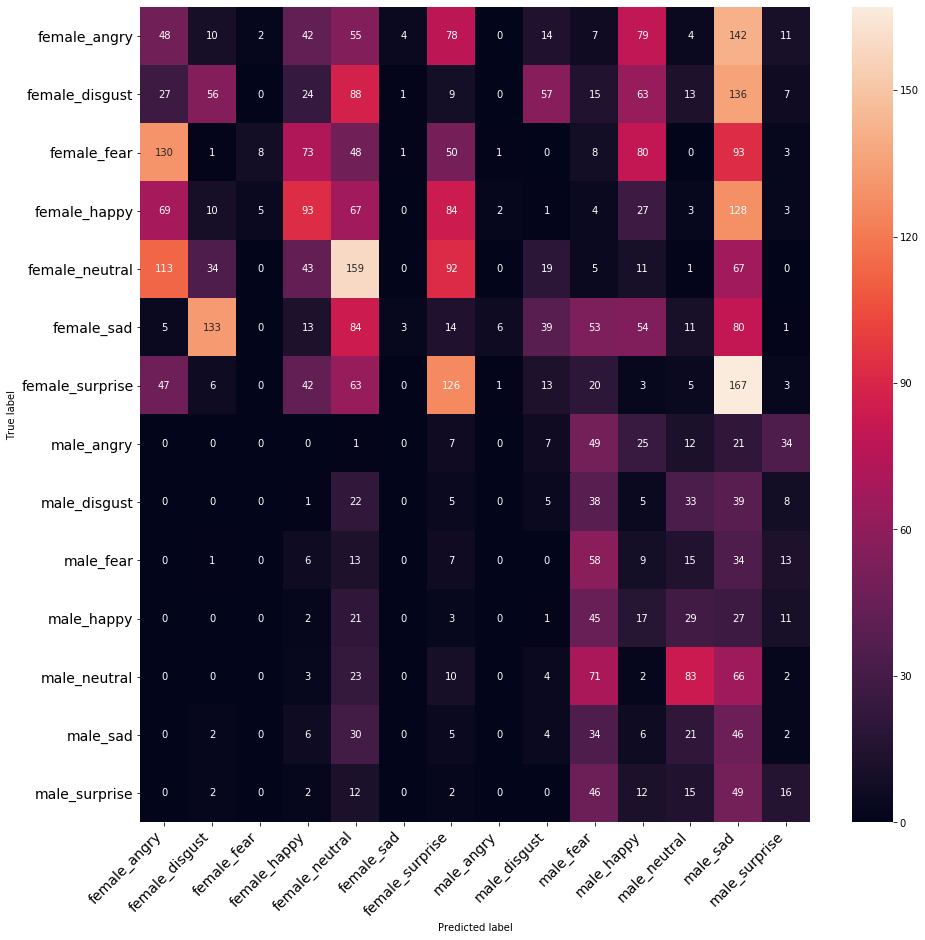

In [0]:
load_and_predict_com('Model_1.h5', 'model_1_json.json')

Loaded model from disk
accuracy: 15.97%
4720/4720 [==============================] - 2s 361us/step
      actualvalues  predictedvalues
170  male_surprise        male_fear
171   male_disgust        male_fear
172   male_neutral     female_happy
173  male_surprise     male_disgust
174     male_happy        male_fear
175       male_sad     male_disgust
176      male_fear        male_fear
177       male_sad  female_surprise
178   male_neutral     male_disgust
179     male_angry        male_fear
0.15974576271186441
                 precision    recall  f1-score   support

   female_angry       0.18      0.62      0.28       496
 female_disgust       0.22      0.08      0.12       496
    female_fear       0.03      0.01      0.01       496
   female_happy       0.00      0.00      0.00       496
 female_neutral       0.23      0.26      0.24       544
     female_sad       0.16      0.02      0.03       496
female_surprise       0.24      0.18      0.20       496
     male_angry       0.01  

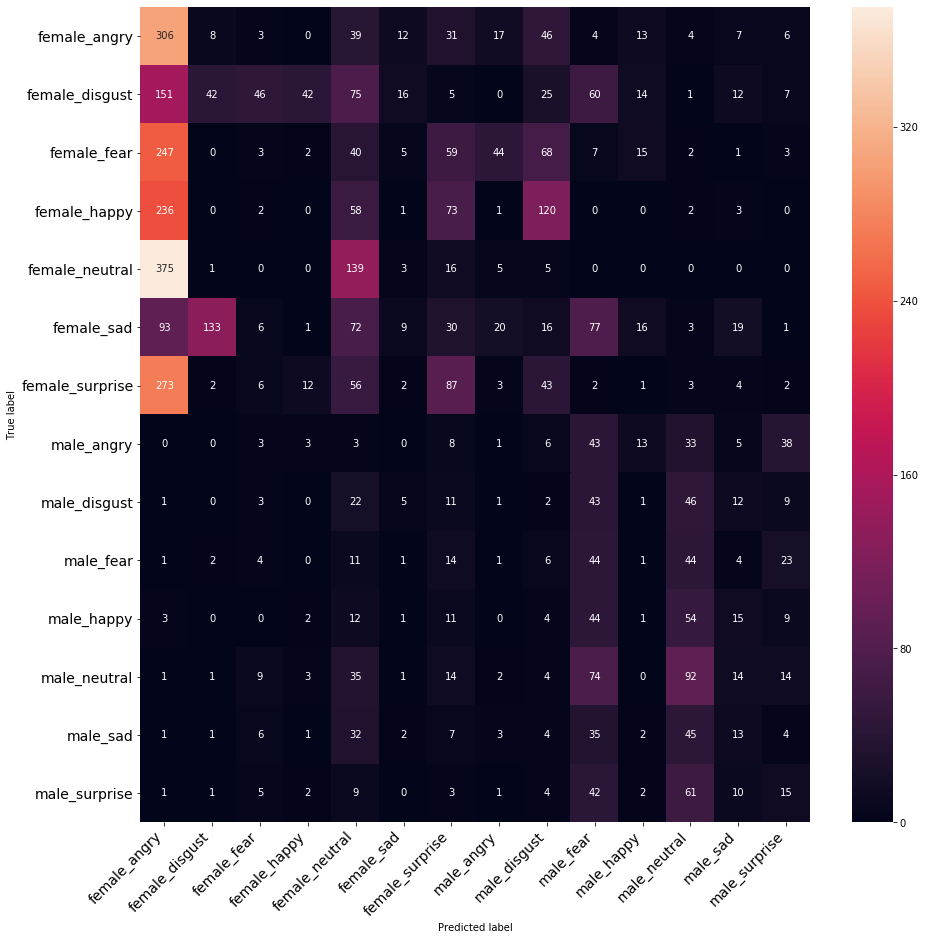

In [0]:
load_and_predict_com('Model_2.h5', 'model_2_json.json')

# Experiment 3: Train the models on Combined dataset and check for the performance on the same

Back to [Experiments and Results](#Experiments-and-Results)

## Now we trained the two models on combined data split into train and test set

In [0]:
X_train, y_train, X_test, y_test, labels = process_data(combined_df, 0.3)

In [0]:
model_1_combined = build_model_1()
model_1_combined_history=model_1_combined.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_40 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_5 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_41 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 27, 256)         

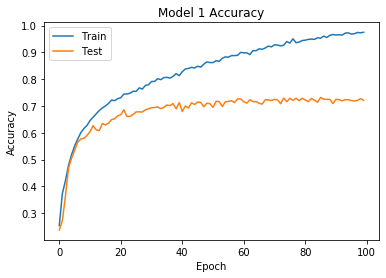

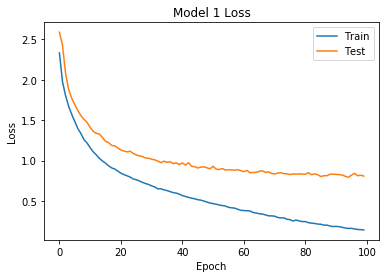

In [0]:
plt.plot(model_1_combined_history.history['accuracy'])
plt.plot(model_1_combined_history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
plt.plot(model_1_combined_history.history['loss'])
plt.plot(model_1_combined_history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Save model and weights
model_name = 'Model_1_combined.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_1_combined.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model_1_combined.to_json()
with open("model_1_combined_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/subodh/Second Semester/ML/Random Project/Audio/saved_models/Model_1_combined.h5 


In [0]:
model_2_combined = build_model_2()
model_2_combined_history=model_2_combined.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 216, 128)          768       
_________________________________________________________________
activation_56 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 216, 128)          82048     
_________________________________________________________________
activation_57 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 27, 128)           0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 27, 128)         

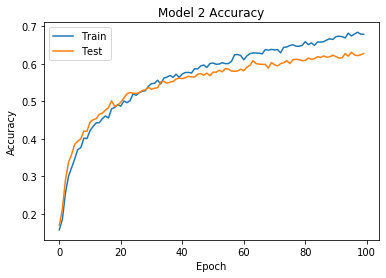

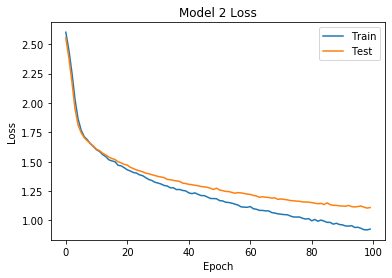

In [0]:
plt.plot(model_2_combined_history.history['accuracy'])
plt.plot(model_2_combined_history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
plt.plot(model_2_combined_history.history['loss'])
plt.plot(model_2_combined_history.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Save model and weights
model_name = 'Model_2_combined.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_2_combined.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model_2_combined.to_json()
with open("model_2_combined_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/subodh/Second Semester/ML/Random Project/Audio/saved_models/Model_2_combined.h5 


## Now that we have saved the models, we can see how they perform on the test data

Loaded model from disk
accuracy: 72.10%
1416/1416 [==============================] - 2s 1ms/step
        actualvalues  predictedvalues
170     female_angry   female_disgust
171   female_neutral   female_neutral
172     male_neutral     male_neutral
173     male_neutral     male_neutral
174     female_happy     female_happy
175     male_neutral     male_neutral
176      female_fear      female_fear
177     female_angry     female_angry
178     male_disgust     male_neutral
179  female_surprise  female_surprise
0.721045197740113
                 precision    recall  f1-score   support

   female_angry       0.67      0.81      0.73       149
 female_disgust       0.91      0.82      0.86       163
    female_fear       0.78      0.86      0.82       152
   female_happy       0.89      0.82      0.85       143
 female_neutral       0.80      0.93      0.86       157
     female_sad       0.84      0.82      0.83       136
female_surprise       0.92      0.77      0.84       137
     male_

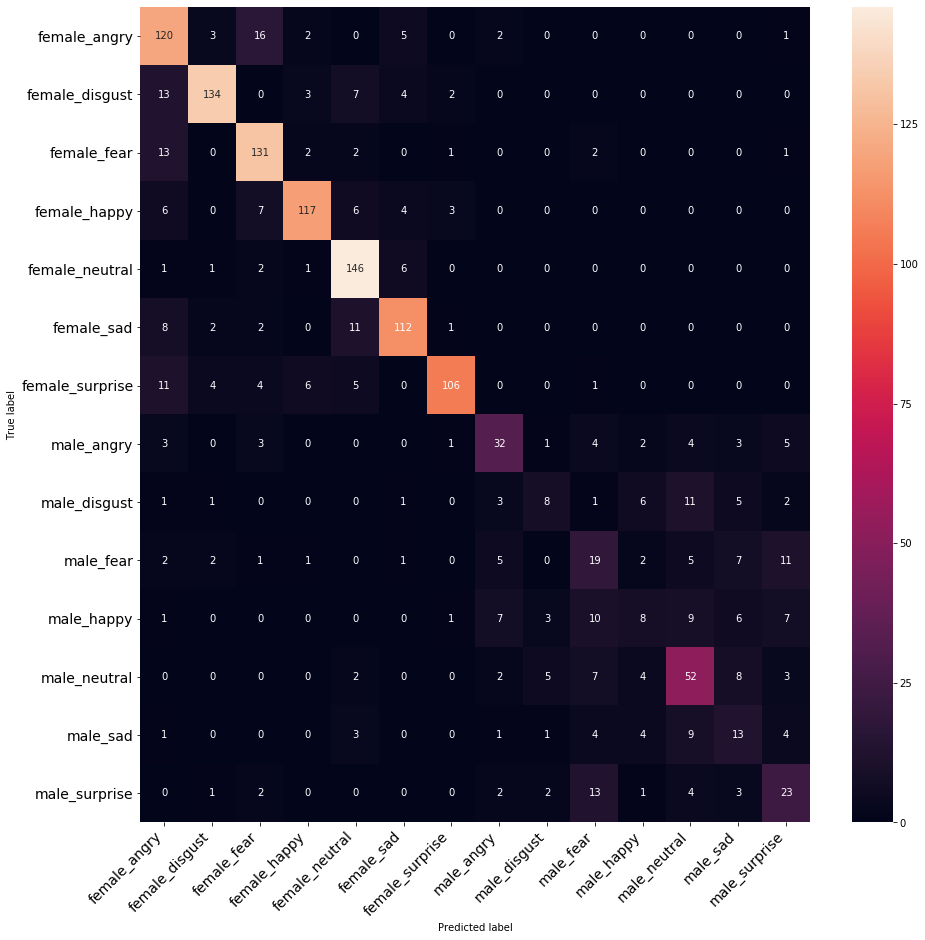

In [0]:
def load_and_print_results(filename, json_filename):
    # loading json and model architecture 
    json_file = open(json_filename, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("saved_models/" + filename)
    print("Loaded model from disk")

    # Keras optimiser
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    score = loaded_model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


    #print(labels.classes_)
    preds = loaded_model.predict(X_test, batch_size = 16, verbose = 1)
    preds = preds.argmax(axis = 1)
    # predictions 
    preds = preds.astype(int).flatten()
    preds = (labels.inverse_transform((preds)))
    preds = pd.DataFrame({'predictedvalues': preds})

    # Actual labels
    actual=y_test.argmax(axis=1)
    actual = actual.astype(int).flatten()
    actual = (labels.inverse_transform((actual)))
    actual = pd.DataFrame({'actualvalues': actual})

    # Lets combined both of them into a single dataframe
    com_finaldf = actual.join(preds)
    print(com_finaldf[170:180])
    com_finaldf.to_csv('Predictions_combined.csv', index = False)
    com_finaldf.groupby('predictedvalues').count()


    com_finaldf = pd.read_csv('Predictions_combined.csv')
    classes = com_finaldf.actualvalues.unique()
    classes.sort()

    c = confusion_matrix(com_finaldf.actualvalues, com_finaldf.predictedvalues)
    print(accuracy_score(com_finaldf.actualvalues, com_finaldf.predictedvalues))
    print_confusion_matrix(c, class_names = classes)

    classes = com_finaldf.actualvalues.unique()
    classes.sort()
    print(classification_report(com_finaldf.actualvalues, com_finaldf.predictedvalues, target_names=classes))
    return com_finaldf
    
com_finaldf = load_and_print_results('Model_1_combined.h5', 'model_1_combined_json.json')

Loaded model from disk
accuracy: 62.78%
1416/1416 [==============================] - 1s 363us/step
        actualvalues  predictedvalues
170     female_angry       female_sad
171   female_neutral   female_neutral
172     male_neutral     male_neutral
173     male_neutral     male_neutral
174     female_happy     female_happy
175     male_neutral     male_neutral
176      female_fear      female_fear
177     female_angry     female_angry
178     male_disgust        male_fear
179  female_surprise  female_surprise
0.6278248587570622
                 precision    recall  f1-score   support

   female_angry       0.71      0.56      0.63       149
 female_disgust       0.87      0.79      0.83       163
    female_fear       0.65      0.68      0.66       152
   female_happy       0.80      0.74      0.77       143
 female_neutral       0.71      0.89      0.79       157
     female_sad       0.78      0.78      0.78       136
female_surprise       0.72      0.79      0.75       137
     ma

actualvalues  predictedvalues
0     female_surprise  female_surprise
1        female_angry       male_angry
2        male_neutral     male_neutral
3           male_fear    male_surprise
4      female_disgust   female_disgust
...               ...              ...
1411       male_happy     male_neutral
1412     female_happy     female_happy
1413   female_neutral   female_neutral
1414        male_fear     male_neutral
1415  female_surprise  female_surprise

[1416 rows x 2 columns]

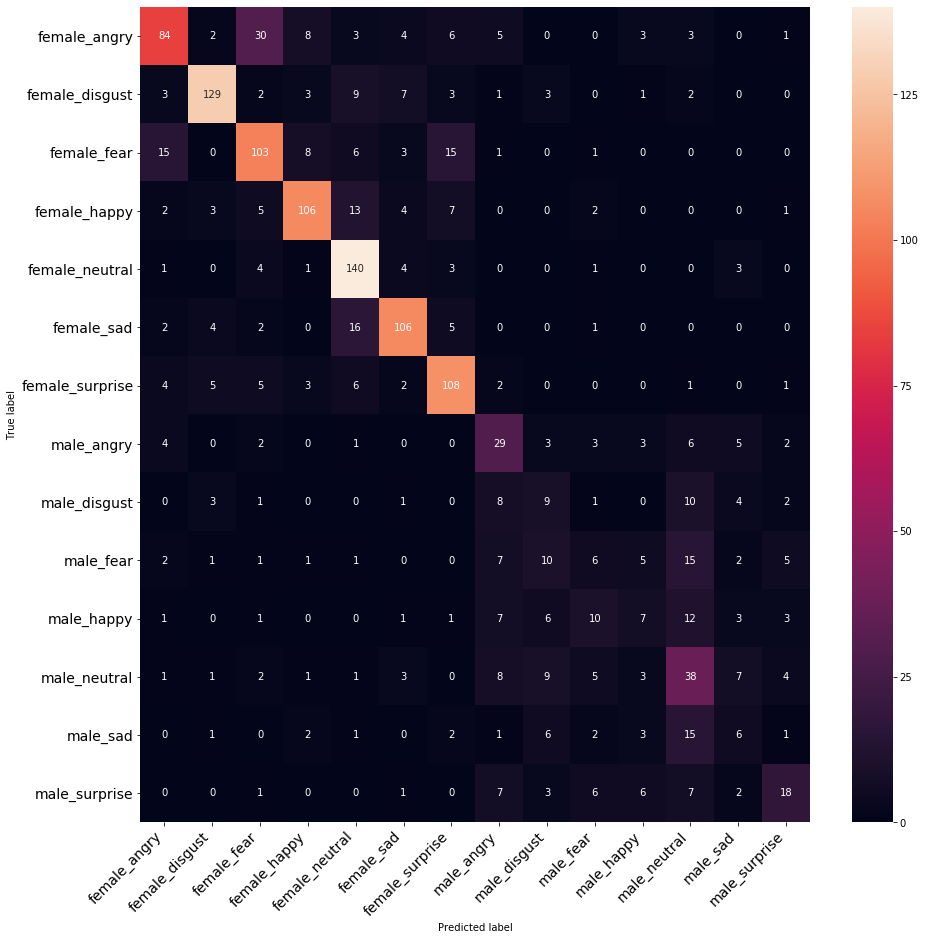

In [0]:
load_and_print_results('Model_2_combined.h5', 'model_2_combined_json.json')

## Now, let's group the gender and check for the results for the combined data

0.9752824858757062
              precision    recall  f1-score   support

      female       0.97      0.99      0.98      1037
        male       0.98      0.93      0.95       379

    accuracy                           0.98      1416
   macro avg       0.98      0.96      0.97      1416
weighted avg       0.98      0.98      0.98      1416



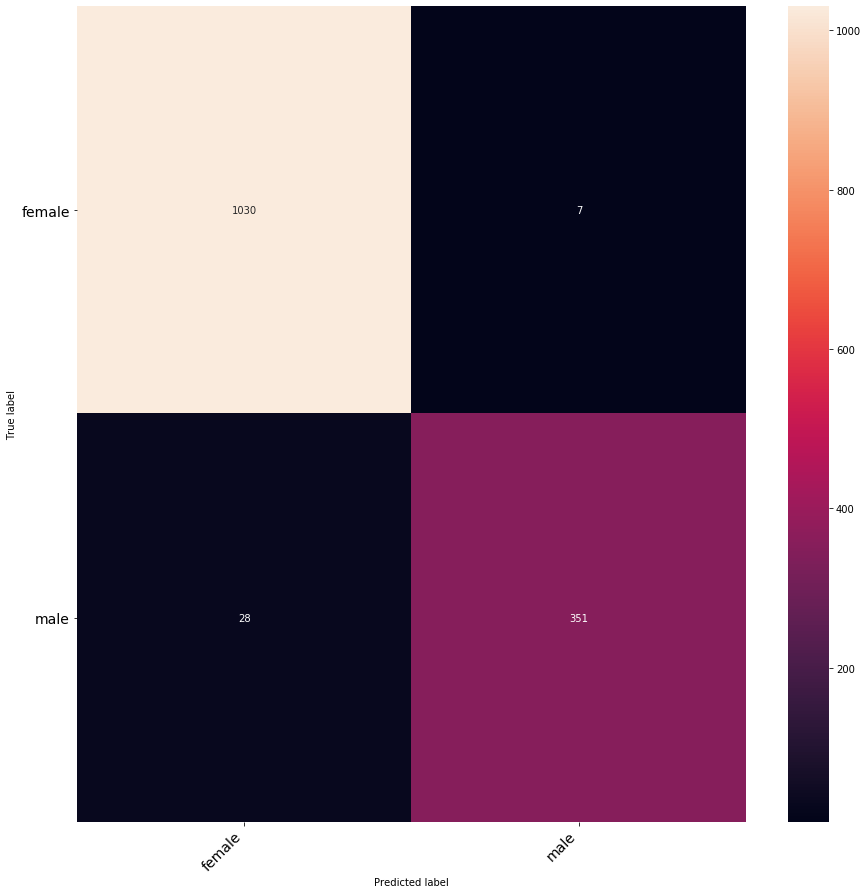

In [0]:
modidf = com_finaldf
modidf['actualvalues'] = com_finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = com_finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

## Let's group together the emotions and look for the performance for the combined data

0.6412429378531074
              precision    recall  f1-score   support

       angry       0.63      0.59      0.61       207
     disgust       0.73      0.71      0.72       202
        fear       0.56      0.53      0.55       208
       happy       0.69      0.58      0.63       195
     neutral       0.58      0.75      0.66       240
         sad       0.67      0.64      0.65       176
    surprise       0.68      0.68      0.68       188

    accuracy                           0.64      1416
   macro avg       0.65      0.64      0.64      1416
weighted avg       0.64      0.64      0.64      1416



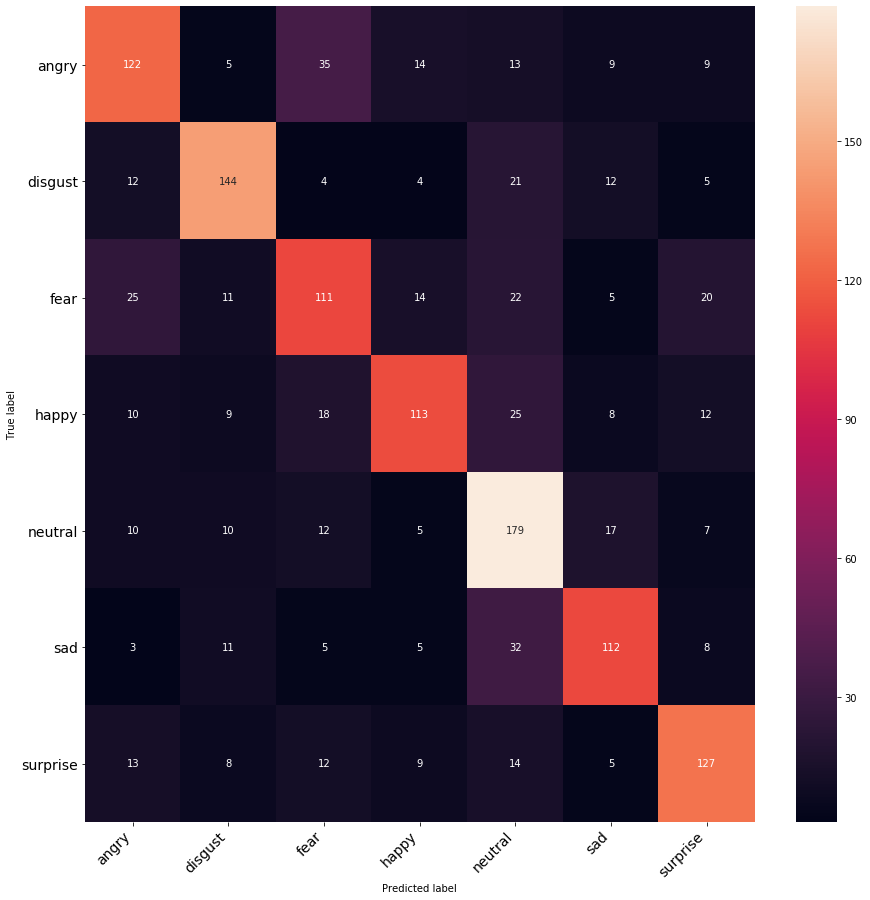

In [0]:
modidf = pd.read_csv("Predictions_combined.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))


### Model 1 gave us accuracy on the combined data of 72.10%, where as Model 2 gave accuracy of 62.78%, so from here on we will only work with Model 1.

# Experiment 4: Now we experiment with the combined data with some augmentation methods

Back to [Experiments and Results](#Experiments-and-Results)

> ### This is a major comparison experiment. We will try to compare the contributions done by augmentation methods in the accuracy
> This experiment is heavily influenced by [Edward Ma](https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6)

## A. Load the combined dataset

In [0]:
from tqdm import tqdm
df = pd.read_csv('./Data_combined.csv')
df.head()

labels source                      path
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav

## B. Define Augmentation Methods
### We define some augmentation methods

In [0]:
def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

## C. Explore the methods

### Let's take some data and try these methods

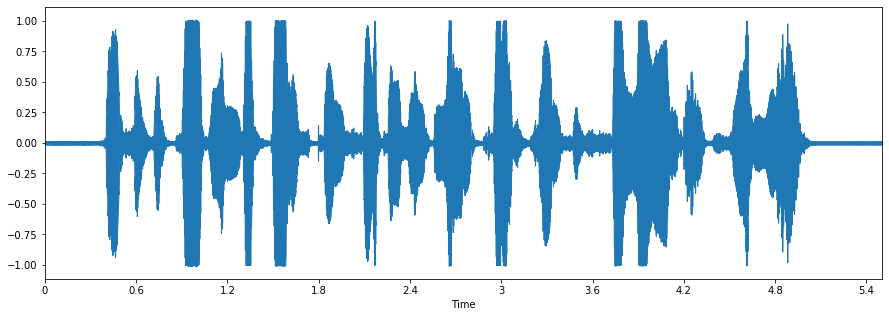

In [0]:
fname = './SAVEE_used/JK_f12.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

## 1. Static Noise

### First we will add static noise in the background and see how it sounds

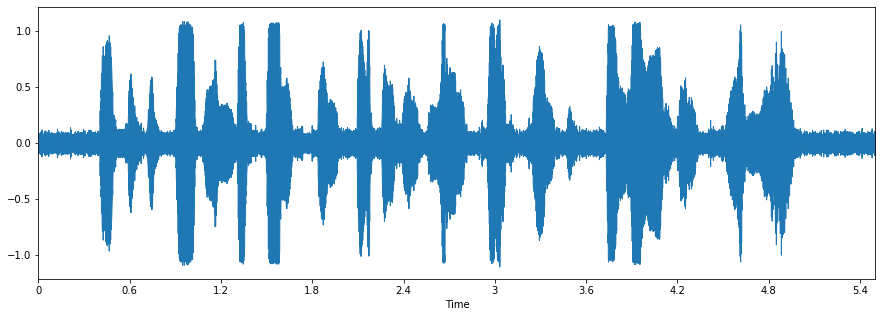

In [0]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## 2. Shift

#### What we did here is we shifted the audio randomly either to the left or the right direction, within fixed audio duration. This is similar to the original plot except there's a tiny bit of delay before the speaker speaks

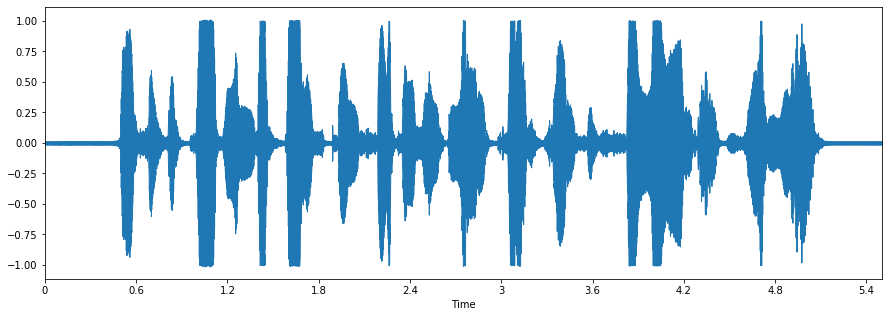

In [0]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## 3. Pitch

#### This method stretches the audio, because of which the duration is longer but the audio wave gets stretched too

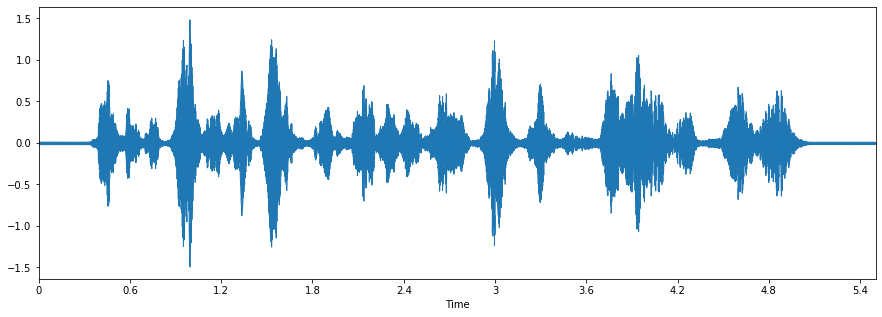

In [0]:
x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## 4. Dynamic Change

#### We try to do some dynamic changes in the audio file

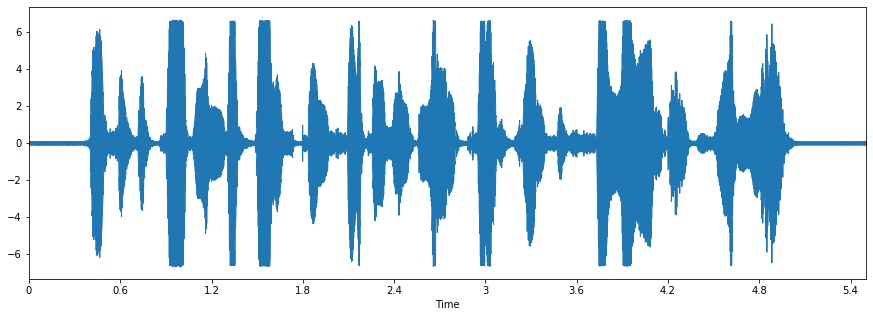

In [0]:
x = dyn_change(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## 5. Speed and Pitch

#### As the name suggests we try to play with the speed and speech of the qudio file

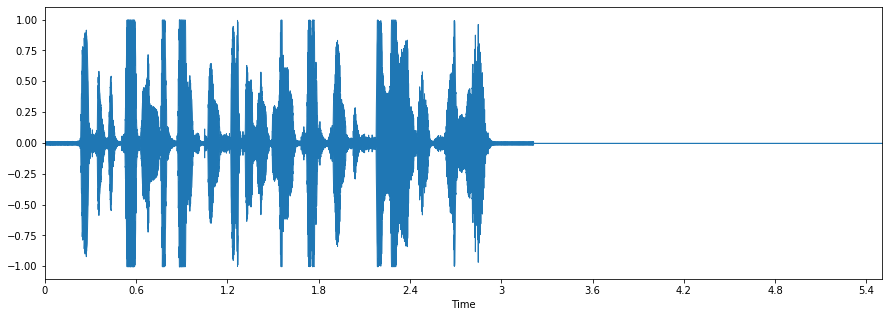

In [0]:
x = speedNpitch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## D. Data Preprocessing

In [0]:
data = pd.read_csv('./Data_combined.csv')
data.head()

labels source                      path
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav

In [0]:
data.shape

(4720, 3)

In [0]:
df = pd.DataFrame(columns=['feature'])
df_noise = pd.DataFrame(columns=['feature'])
df_speedpitch = pd.DataFrame(columns=['feature'])
cnt = 0
# feature extraction
for i in tqdm(data.path):    
    X, sample_rate = librosa.load(i, res_type='kaiser_fast'
                                  , duration=2.5
                                  , sr=44100
                                  , offset=0.5
                                    )

    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=np.array(sample_rate), 
                                        n_mfcc=13),
                                        axis=0)
    df.loc[cnt] = [mfccs]
    aug = noise(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                                    axis=0)
    df_noise.loc[cnt] = [aug]

    # speed pitch
    aug = speedNpitch(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_speedpitch.loc[cnt] = [aug]   

    cnt += 1

df.head()

100%|██████████| 4720/4720 [05:25<00:00, 14.50it/s]


feature
0  [-30.205614, -28.294016, -27.90939, -28.50983,...
1  [-40.3034, -37.9193, -36.6451, -28.010498, -24...
2  [-21.392101, -21.662266, -22.259338, -24.44498...
3  [-24.90076, -24.354008, -23.842062, -23.96136,...
4  [-35.30234, -35.13114, -36.651817, -40.39294, ...

In [0]:
# combine 
df = pd.concat([data,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df_noise = pd.concat([data,pd.DataFrame(df_noise['feature'].values.tolist())],axis=1)
df_speedpitch = pd.concat([data,pd.DataFrame(df_speedpitch['feature'].values.tolist())],axis=1)
print(df.shape,df_noise.shape,df_speedpitch.shape)


(4720, 219) (4720, 219) (4720, 219)


In [0]:
df = pd.concat([df,df_noise,df_speedpitch],axis=0,sort=False)
df=df.fillna(0)
del df_noise, df_speedpitch

df.head()

labels source                      path          0          1  \
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav -30.205614 -28.294016   
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav -40.303398 -37.919300   
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav -21.392101 -21.662266   
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav -24.900761 -24.354008   
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav -35.302341 -35.131142   

           2          3          4          5          6  ...        206  \
0 -27.909389 -28.509830 -28.120195 -28.570707 -29.546034  ...   0.000000   
1 -36.645100 -28.010498 -24.288029 -22.791922 -23.459490  ...   0.000000   
2 -22.259338 -24.444984 -23.050682 -23.140684 -22.903954  ... -22.763048   
3 -23.842062 -23.961361 -21.653095 -21.758453 -23.224234  ... -25.985544   
4 -36.651817 -40.392941 -40.899864 -39.890297 -37.871014  ... -38.050453   

         207        208        209        210        211        212  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2 -21.701115 -11.972590  -9.322908 -10.145143 -12.772147 -14.352438   
3 -19.891569 -15.183666 -13.054301 -12.797897 -11.673220  -9.116754   
4 -36.393749 -36.336716 -37.973526 -32.837669 -29.188053 -29.468193   

         213        214        215  
0   0.000000   0.000000   0.000000  
1   0.000000   0.000000   0.000000  
2 -16.328117 -12.141912  -6.584519  
3  -8.331745  -8.620239  -7.165553  
4 -31.124041 -26.687956 -22.051907  

[5 rows x 219 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
3153 -19.676512 -23.396910 -34.020939 -33.329849 -29.642826 -29.498608   
1406 -46.517067 -46.517067 -46.517067 -46.517067 -46.517067 -46.517067   
3863 -31.171440 -32.247330 -33.870255 -33.905083 -33.786892 -35.060898   
3076 -23.684439 -25.834816 -36.033062 -37.161190 -35.740543 -34.186390   
1387 -60.710445 -60.710445 -60.710445 -60.710445 -60.710445 -60.710445   
1539 -42.335976 -39.704937 -39.089779 -38.157162 -38.366306 -38.743790   
852  -41.479099 -40.854713 -40.902458 -40.164665 -39.799412 -39.881203   
3164 -19.752104 -21.232588 -24.323814 -23.761780 -23.164494 -23.660288   
1909 -58.269451 -58.269451 -58.269451 -58.269451 -58.269451 -58.269451   
3948   0.516810  -2.895117  -9.617130 -10.407608 -11.494343 -11.967142   

            6          7          8          9    ...        206        207  \
3153 -29.849100 -29.572702 -30.188053 -31.178677  ...   0.000000   0.000000   
1406 -46.517067 -46.517067 -46.517067 -46.517067  ... -31.490894 -31.275990   
3863 -34.166695 -34.314499 -36.433384 -36.262596  ...   0.000000   0.000000   
3076 -35.416485 -37.115284 -38.435276 -36.491867  ...   0.000000   0.000000   
1387 -60.710445 -60.710445 -60.710445 -60.710445  ... -60.710445 -60.710445   
1539 -39.434391 -38.587292 -39.972046 -42.647263  ... -40.005379 -40.241177   
852  -41.160500 -40.562630 -38.974007 -38.688774  ... -25.137627 -25.724409   
3164 -23.135611 -23.077129 -23.061636 -23.905149  ...   0.000000   0.000000   
1909 -58.269451 -58.269451 -58.542385 -57.179745  ... -58.269451 -58.269451   
3948 -11.295981 -11.034580 -13.457041 -11.022572  ...   0.000000   0.000000   

            208        209        210        211        212        213  \
3153   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1406 -31.752699 -33.640179 -32.239552 -31.140381 -31.129709 -34.016731   
3863   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3076   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1387 -60.710445 -60.710445 -60.710445 -60.710445 -60.710445 -60.710445   
1539 -40.178467 -36.949825 -36.158806 -38.596119 -40.459488 -37.236595   
852  -26.515440 -26.058014 -25.218809 -25.929684 -26.585421 -26.452057   
3164   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1909 -58.269451 -58.269451 -58.269451 -58.269451 -58.269451 -58.269451   
3948   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

            214        215  
3153   0.000000   0.000000  
1406 -23.477995 -14.838339  
3863   0.000000   0.000000  
3076   0.000000   0.000000  
1387 -60.710445 -60.710445  
1539 -37.271175 -39.963707  
852  -26.296618 -24.204966  
3164   0.000000   0.000000  
1909 -58.269451 -58.269451  
3948   0.000000   0.000000  

[10 rows x 216 columns]

In [0]:
# Let's do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
3153  0.389000  0.288465 -0.042269 -0.000866  0.252767  0.256418  0.225351   
1406 -1.113550 -1.107112 -0.941076 -0.942721 -0.944816 -0.945453 -0.947116   
3863 -0.254493 -0.245763 -0.031430 -0.041951 -0.041341 -0.136400 -0.078360   
3076  0.164634  0.141308 -0.186994 -0.274507 -0.179994 -0.074640 -0.166273   
1387 -1.908104 -1.963851 -1.961962 -1.956437 -1.952135 -1.947813 -1.945515   
1539 -0.879490 -0.695919 -0.406855 -0.345641 -0.366347 -0.396491 -0.448903   
852  -0.831522 -0.765321 -0.537235 -0.489021 -0.468057 -0.476817 -0.570322   
3164  0.384768  0.419107  0.655215  0.682502  0.712542  0.668730  0.697595   
1909 -1.771455 -1.816508 -1.786389 -1.782096 -1.778895 -1.775426 -1.773809   
3948  1.519434  1.525992  1.713022  1.636280  1.540785  1.494519  1.530425   

           7         8         9    ...       206       207       208  \
3153  0.239746  0.192685  0.117809  ...  0.705770  0.705920  0.704998   
1406 -0.947890 -0.952211 -0.955565  ... -0.652127 -0.640370 -0.660505   
3863 -0.092608 -0.245202 -0.237961  ...  0.705770  0.705920  0.704998   
3076 -0.288916 -0.385563 -0.254006  ...  0.705770  0.705920  0.704998   
1387 -1.942708 -1.947369 -1.948811  ... -1.912083 -1.907389 -1.905813   
1539 -0.392089 -0.493312 -0.684758  ... -1.019274 -1.026280 -1.022850   
852  -0.530541 -0.423335 -0.407744  ... -0.378172 -0.401399 -0.435280   
3164  0.695023  0.692348  0.626807  ...  0.705770  0.705920  0.704998   
1909 -1.771618 -1.795357 -1.701734  ... -1.806826 -1.802316 -1.800840   
3948  1.539089  1.365767  1.528324  ...  0.705770  0.705920  0.704998   

           209       210       211       212       213       214       215  
3153  0.704688  0.704279  0.704222  0.704197  0.704350  0.698001  0.690906  
1406 -0.740194 -0.678716 -0.630417 -0.627605 -0.747961 -0.304138  0.060526  
3863  0.704688  0.704279  0.704222  0.704197  0.704350  0.698001  0.690906  
3076  0.704688  0.704279  0.704222  0.704197  0.704350  0.698001  0.690906  
1387 -1.902892 -1.900046 -1.897754 -1.893139 -1.887623 -1.893375 -1.888270  
1539 -0.882347 -0.846842 -0.949961 -1.026755 -0.885430 -0.892889 -1.006881  
852  -0.414532 -0.377544 -0.407093 -0.433190 -0.424995 -0.424449 -0.337399  
3164  0.704688  0.704279  0.704222  0.704197  0.704350  0.698001  0.690906  
1909 -1.798048 -1.795333 -1.793136 -1.788708 -1.783407 -1.789183 -1.784568  
3948  0.704688  0.704279  0.704222  0.704197  0.704350  0.698001  0.690906  

[10 rows x 216 columns]

In [0]:
# Lets do few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(10620, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [0]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(10620, 216, 1)

In [0]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_57 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_72 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_9 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_73 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 27, 256)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_test, y_test))

Train on 10620 samples, validate on 3540 samples
Epoch 1/150
10620/10620 [==============================] - 82s 8ms/step - loss: 1.8040 - accuracy: 0.3830 - val_loss: 1.8671 - val_accuracy: 0.3986
Epoch 2/150
10620/10620 [==============================] - 85s 8ms/step - loss: 1.6535 - accuracy: 0.4325 - val_loss: 1.7403 - val_accuracy: 0.4418
Epoch 3/150
10620/10620 [==============================] - 83s 8ms/step - loss: 1.5376 - accuracy: 0.4782 - val_loss: 1.6651 - val_accuracy: 0.5079
Epoch 4/150
10620/10620 [==============================] - 86s 8ms/step - loss: 1.4397 - accuracy: 0.5223 - val_loss: 1.5794 - val_accuracy: 0.5475
Epoch 5/150
10620/10620 [==============================] - 86s 8ms/step - loss: 1.3564 - accuracy: 0.5454 - val_loss: 1.4983 - val_accuracy: 0.5647
Epoch 6/150
10620/10620 [==============================] - 85s 8ms/step - loss: 1.2932 - accuracy: 0.5734 - val_loss: 1.4360 - val_accuracy: 0.5816
Epoch 7/150
10620/10620 [==============================] - 86s 

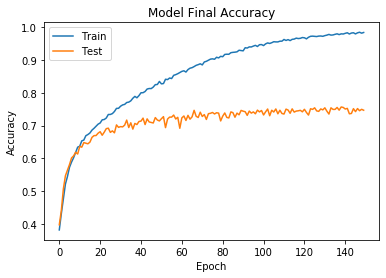

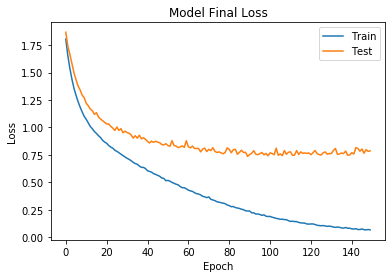

In [0]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Final Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Final Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Save model and weights
model_name = 'Model_final.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_final_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/subodh/Second Semester/ML/Random Project/Audio/saved_models/Model_final.h5 


In [0]:
# loading json and model architecture 
json_file = open('model_final_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Model_final.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 74.66%


In [0]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

3540/3540 [==============================] - 5s 2ms/step


array([8, 4, 5, ..., 3, 2, 4])

In [0]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170    female_angry    female_angry
171  female_neutral  female_neutral
172    female_angry      male_happy
173     female_fear    female_angry
174        male_sad  female_disgust
175    female_angry    female_angry
176     female_fear     female_fear
177    male_neutral       male_fear
178  female_neutral  female_neutral
179    female_happy    female_happy

In [0]:
# Write out the predictions to disk
finaldf.to_csv('Predictions_final.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              448
female_disgust            374
female_fear               367
female_happy              386
female_neutral            382
female_sad                391
female_surprise           342
male_angry                 82
male_disgust               84
male_fear                 206
male_happy                 84
male_neutral              123
male_sad                  189
male_surprise              82

0.7466101694915255


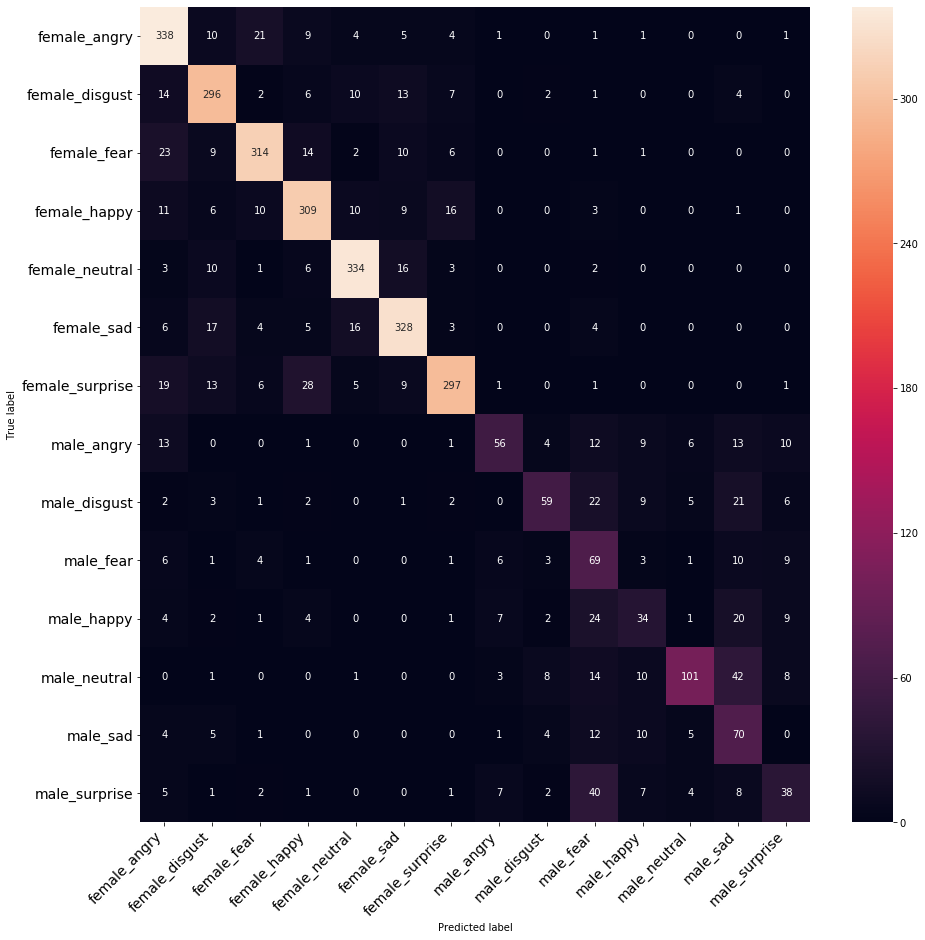

In [0]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions_final.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [0]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.75      0.86      0.80       395
 female_disgust       0.79      0.83      0.81       355
    female_fear       0.86      0.83      0.84       380
   female_happy       0.80      0.82      0.81       375
 female_neutral       0.87      0.89      0.88       375
     female_sad       0.84      0.86      0.85       383
female_surprise       0.87      0.78      0.82       380
     male_angry       0.68      0.45      0.54       125
   male_disgust       0.70      0.44      0.54       133
      male_fear       0.33      0.61      0.43       114
     male_happy       0.40      0.31      0.35       109
   male_neutral       0.82      0.54      0.65       188
       male_sad       0.37      0.62      0.47       112
  male_surprise       0.46      0.33      0.38       116

       accuracy                           0.75      3540
      macro avg       0.68      0.65      0.66      3540
   weighted avg       0.76   

0.9720338983050848


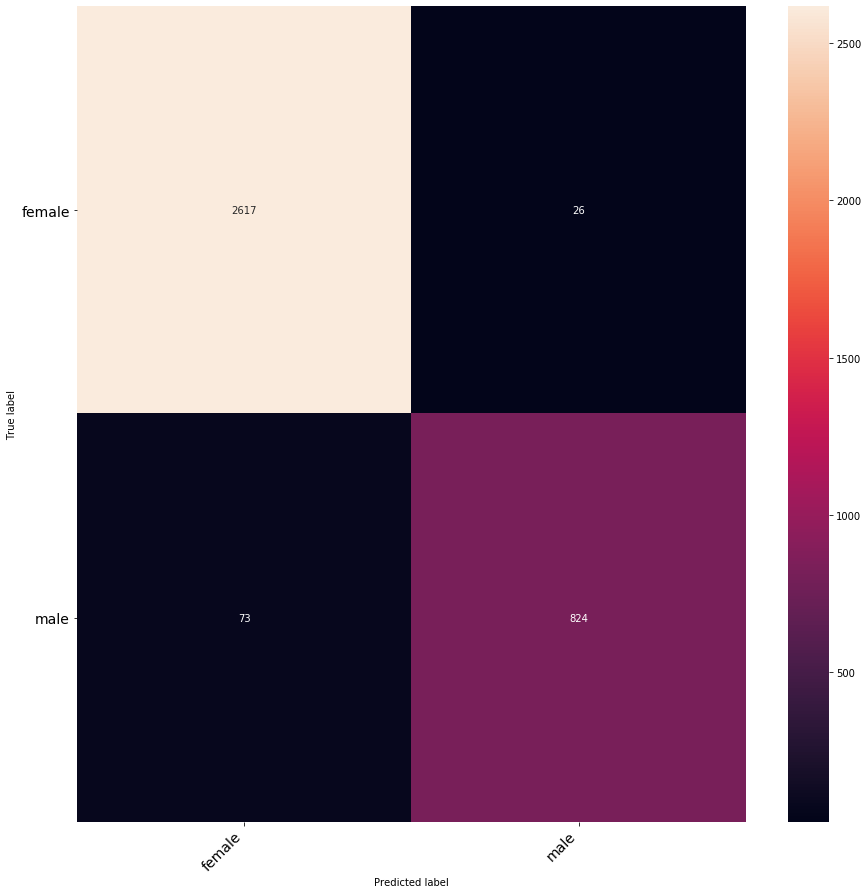

In [0]:

modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [0]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.97      0.99      0.98      2643
        male       0.97      0.92      0.94       897

    accuracy                           0.97      3540
   macro avg       0.97      0.95      0.96      3540
weighted avg       0.97      0.97      0.97      3540



0.7553672316384181


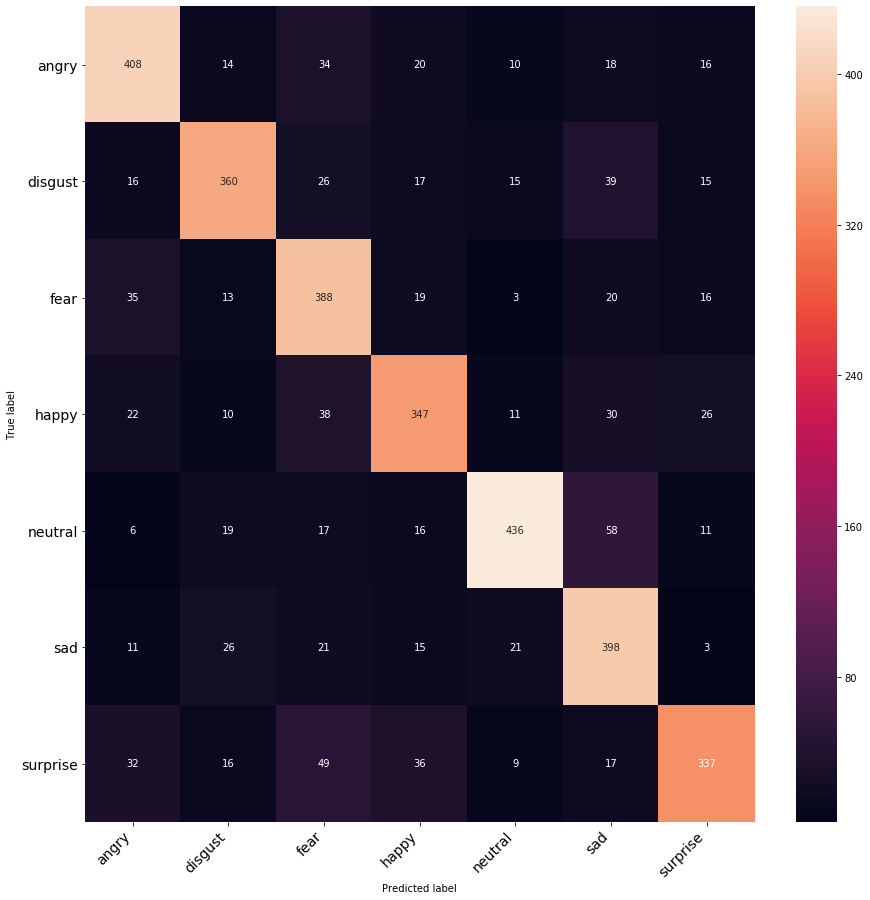

In [0]:
modidf = pd.read_csv("Predictions_final.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [0]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.77      0.78      0.78       520
     disgust       0.79      0.74      0.76       488
        fear       0.68      0.79      0.73       494
       happy       0.74      0.72      0.73       484
     neutral       0.86      0.77      0.82       563
         sad       0.69      0.80      0.74       495
    surprise       0.79      0.68      0.73       496

    accuracy                           0.76      3540
   macro avg       0.76      0.75      0.75      3540
weighted avg       0.76      0.76      0.76      3540



### The accuracy we got after augmentation is 74.66% as compared to 72.10% without augmentation. 

# Experiment  5: Train and test on RAVDESS(Not Randomized)

#### In this experiment we will take the first 20 actors of RAVDESS dataset and train model on them, then we will test it's accuracy on the rest of the actors.

#### From earlier experiment we have found that augmentation methods helps in improving the accuracy, we will put that to test here as well.

Back to [Experiments and Results](#Experiments-and-Results)

> This experiment is heavily influenced by this experiment by [Reza Chu](https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3)

### 1. Reading Data

In [0]:
path_ = './RAVDESS/'
data = os.listdir(path_)
data.sort()
print(data)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [0]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in data:
    file_list = os.listdir(path_ + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = path_ + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [0]:
print(len(data_df))
data_df.head()

1440


path source actor gender intensity  \
0  ./RAVDESS/Actor_01/03-01-05-01-01-01-01.wav      1     1   male         0   
1  ./RAVDESS/Actor_01/03-01-07-01-02-01-01.wav      1     1   male         0   
2  ./RAVDESS/Actor_01/03-01-07-01-01-01-01.wav      1     1   male         0   
3  ./RAVDESS/Actor_01/03-01-02-01-02-02-01.wav      1     1   male         0   
4  ./RAVDESS/Actor_01/03-01-03-01-01-02-01.wav      1     1   male         0   

  statement repetition emotion         label  
0         0          0       5    male_angry  
1         1          0       7  male_disgust  
2         0          0       7  male_disgust  
3         1          1       2     male_calm  
4         0          1       3    male_happy

### 2. Plotting waveform and Spectogram

In [0]:
# We will choose a random file

filename = data_df.path[1057]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

./RAVDESS/Actor_18/03-01-02-02-01-01-18.wav


(22050, array([ 4.7052872e-11, -6.9230288e-11,  9.6121958e-11, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32))

In [0]:
len(samples), sample_rate

(79460, 22050)

In [0]:
# define function to plot spectogram
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [0]:
sample_rate/len(samples)

0.27749811225773974

Text(0.5, 0, 'Seconds')

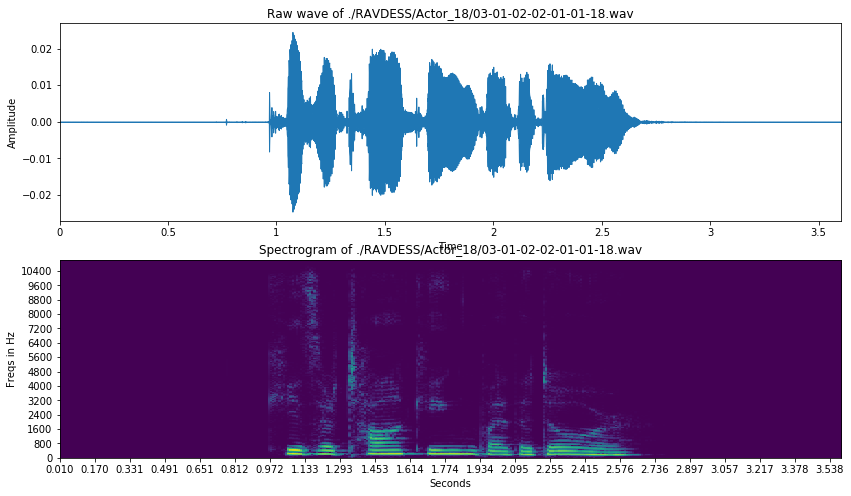

In [0]:
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [0]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [0]:
aa, bb = librosa.effects.trim(samples, top_db = 30)
aa, bb

(array([-4.4609305e-07,  4.4025666e-07, -4.2128403e-07, ...,
         9.1547212e-05,  9.2423223e-05,  4.7072081e-05], dtype=float32),
 array([20480, 59904]))

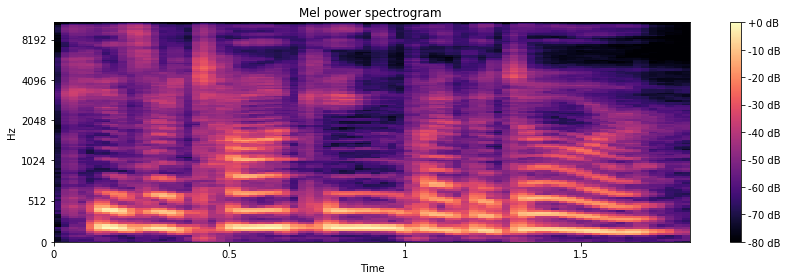

In [0]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

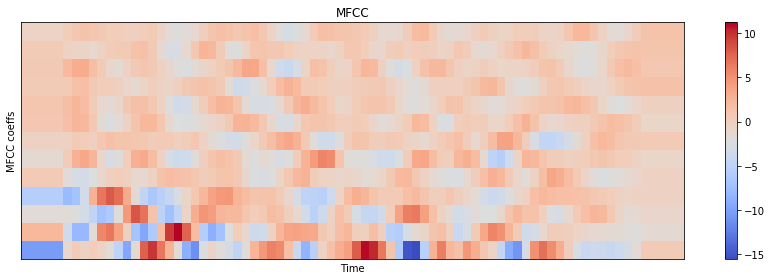

In [0]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [0]:
# Let's hear original sound
ipd.Audio(samples, rate = sample_rate)

In [0]:
# Let's hear silence-trimmed sound by librosa.effects.trim()
# This will trim
ipd.Audio(aa, rate = sample_rate)

In [0]:
# Silence trimmed Sound by manuel trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [0]:
data_df.emotion.unique()

array([5, 7, 2, 3, 6, 8, 4, 1], dtype=object)

In [0]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [0]:
data_df['label'] = label8_list
data_df.head()

path source actor gender intensity  \
0  ./RAVDESS/Actor_01/03-01-05-01-01-01-01.wav      1     1   male         0   
1  ./RAVDESS/Actor_01/03-01-07-01-02-01-01.wav      1     1   male         0   
2  ./RAVDESS/Actor_01/03-01-07-01-01-01-01.wav      1     1   male         0   
3  ./RAVDESS/Actor_01/03-01-02-01-02-02-01.wav      1     1   male         0   
4  ./RAVDESS/Actor_01/03-01-03-01-01-02-01.wav      1     1   male         0   

  statement repetition emotion         label  
0         0          0       5    male_angry  
1         1          0       7  male_disgust  
2         0          0       7  male_disgust  
3         1          1       2     male_calm  
4         0          1       3    male_happy

In [0]:
print (data_df.label.value_counts().keys())

Index(['female_sad', 'female_calm', 'female_surprised', 'male_angry',
       'female_happy', 'male_disgust', 'male_fearful', 'male_happy',
       'male_calm', 'female_fearful', 'male_surprised', 'female_disgust',
       'male_sad', 'female_angry', 'male_neutral', 'female_neutral'],
      dtype='object')


In [0]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


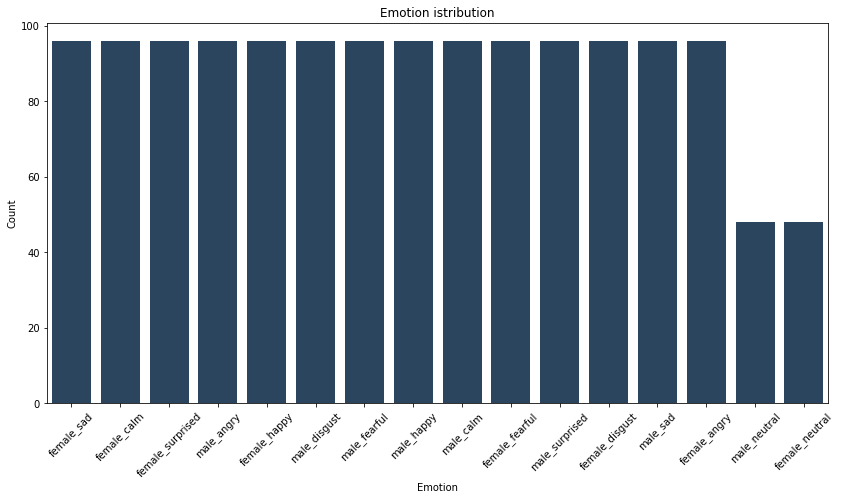

In [0]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#234567", "Emotion istribution")

In [0]:
data2_df = data_df.copy()

In [0]:
data2_df

path source actor  gender  \
0     ./RAVDESS/Actor_01/03-01-05-01-01-01-01.wav      1     1    male   
1     ./RAVDESS/Actor_01/03-01-07-01-02-01-01.wav      1     1    male   
2     ./RAVDESS/Actor_01/03-01-07-01-01-01-01.wav      1     1    male   
3     ./RAVDESS/Actor_01/03-01-02-01-02-02-01.wav      1     1    male   
4     ./RAVDESS/Actor_01/03-01-03-01-01-02-01.wav      1     1    male   
...                                           ...    ...   ...     ...   
1435  ./RAVDESS/Actor_24/03-01-05-01-02-02-24.wav      1    24  female   
1436  ./RAVDESS/Actor_24/03-01-07-01-01-02-24.wav      1    24  female   
1437  ./RAVDESS/Actor_24/03-01-04-02-02-02-24.wav      1    24  female   
1438  ./RAVDESS/Actor_24/03-01-06-01-02-01-24.wav      1    24  female   
1439  ./RAVDESS/Actor_24/03-01-02-02-02-01-24.wav      1    24  female   

     intensity statement repetition emotion           label  
0            0         0          0       5      male_angry  
1            0         1          0       7    male_disgust  
2            0         0          0       7    male_disgust  
3            0         1          1       2       male_calm  
4            0         0          1       3      male_happy  
...        ...       ...        ...     ...             ...  
1435         0         1          1       5    female_angry  
1436         0         0          1       7  female_disgust  
1437         1         1          1       4      female_sad  
1438         0         1          0       6  female_fearful  
1439         1         1          0       2     female_calm  

[1440 rows x 9 columns]

In [0]:
tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]

In [0]:
data3_df = pd.concat([tmp1, tmp2, tmp3, tmp4],ignore_index=True).reset_index(drop=True)

In [0]:
data3_df

path source actor  gender  \
0    ./RAVDESS/Actor_21/03-01-04-01-01-01-21.wav      1    21    male   
1    ./RAVDESS/Actor_21/03-01-05-02-02-01-21.wav      1    21    male   
2    ./RAVDESS/Actor_21/03-01-06-02-01-02-21.wav      1    21    male   
3    ./RAVDESS/Actor_21/03-01-05-02-01-02-21.wav      1    21    male   
4    ./RAVDESS/Actor_21/03-01-05-01-02-01-21.wav      1    21    male   
..                                           ...    ...   ...     ...   
235  ./RAVDESS/Actor_24/03-01-05-01-02-02-24.wav      1    24  female   
236  ./RAVDESS/Actor_24/03-01-07-01-01-02-24.wav      1    24  female   
237  ./RAVDESS/Actor_24/03-01-04-02-02-02-24.wav      1    24  female   
238  ./RAVDESS/Actor_24/03-01-06-01-02-01-24.wav      1    24  female   
239  ./RAVDESS/Actor_24/03-01-02-02-02-01-24.wav      1    24  female   

    intensity statement repetition emotion           label  
0           0         0          0       4        male_sad  
1           1         1          0       5      male_angry  
2           1         0          1       6    male_fearful  
3           1         0          1       5      male_angry  
4           0         1          0       5      male_angry  
..        ...       ...        ...     ...             ...  
235         0         1          1       5    female_angry  
236         0         0          1       7  female_disgust  
237         1         1          1       4      female_sad  
238         0         1          0       6  female_fearful  
239         1         1          0       2     female_calm  

[240 rows x 9 columns]

In [0]:
data2_df = data2_df[data2_df.actor != 21].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 22].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)

In [0]:
data2_df

path source actor  gender  \
0     ./RAVDESS/Actor_01/03-01-05-01-01-01-01.wav      1     1    male   
1     ./RAVDESS/Actor_01/03-01-07-01-02-01-01.wav      1     1    male   
2     ./RAVDESS/Actor_01/03-01-07-01-01-01-01.wav      1     1    male   
3     ./RAVDESS/Actor_01/03-01-02-01-02-02-01.wav      1     1    male   
4     ./RAVDESS/Actor_01/03-01-03-01-01-02-01.wav      1     1    male   
...                                           ...    ...   ...     ...   
1195  ./RAVDESS/Actor_20/03-01-02-02-02-01-20.wav      1    20  female   
1196  ./RAVDESS/Actor_20/03-01-08-02-01-01-20.wav      1    20  female   
1197  ./RAVDESS/Actor_20/03-01-02-01-01-02-20.wav      1    20  female   
1198  ./RAVDESS/Actor_20/03-01-04-02-02-01-20.wav      1    20  female   
1199  ./RAVDESS/Actor_20/03-01-06-01-02-01-20.wav      1    20  female   

     intensity statement repetition emotion             label  
0            0         0          0       5        male_angry  
1            0         1          0       7      male_disgust  
2            0         0          0       7      male_disgust  
3            0         1          1       2         male_calm  
4            0         0          1       3        male_happy  
...        ...       ...        ...     ...               ...  
1195         1         1          0       2       female_calm  
1196         1         0          0       8  female_surprised  
1197         0         0          1       2       female_calm  
1198         1         1          0       4        female_sad  
1199         0         1          0       6    female_fearful  

[1200 rows x 9 columns]

In [0]:
input_duration = 3
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    # X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

data.head()

100%|██████████| 1200/1200 [01:35<00:00, 12.51it/s]


feature
0  [-55.507362, -55.729572, -55.716793, -55.83580...
1  [-69.40937, -69.40937, -69.40937, -69.40937, -...
2  [-54.985146, -54.91457, -54.93782, -56.227646,...
3  [-69.0514, -69.0514, -69.0514, -69.0514, -69.0...
4  [-60.369045, -60.083717, -60.978924, -60.95245...

In [0]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [0]:
df3.head()

0          1          2          3          4          5    \
0 -55.507362 -55.729572 -55.716793 -55.835808 -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370   
2 -54.985146 -54.914570 -54.937820 -56.227646 -56.685261 -57.022507   
3 -69.051399 -69.051399 -69.051399 -69.051399 -69.051399 -68.754860   
4 -60.369045 -60.083717 -60.978924 -60.952457 -60.982483 -60.983948   

         6          7          8          9    ...        249        250  \
0 -55.932133 -55.932133 -55.932133 -55.932133  ... -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370  ... -63.676579 -57.841850   
2 -58.089943 -58.376122 -58.420403 -56.623604  ... -63.795944 -64.638062   
3 -69.051399 -69.051399 -69.051399 -68.359085  ... -65.446953 -68.552094   
4 -60.981255 -60.981255 -60.981255 -60.249615  ... -60.981255 -60.981255   

         251        252        253        254        255        256  \
0 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133   
1 -48.709694 -44.560093 -44.730862 -51.467548 -53.909016 -47.980164   
2 -65.028267 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340   
3 -69.051399 -69.051399 -69.051399 -68.688614 -69.051399        NaN   
4 -60.981255 -60.981255 -60.981255 -60.981255 -60.981255        NaN   

         257        258  
0 -55.932133 -55.932133  
1 -43.389336 -43.327263  
2 -65.215340 -65.215340  
3        NaN        NaN  
4        NaN        NaN  

[5 rows x 259 columns]

In [0]:
labels.unique()

array(['male_angry', 'male_disgust', 'male_calm', 'male_happy',
       'male_fearful', 'male_surprised', 'male_sad', 'male_neutral',
       'female_calm', 'female_happy', 'female_fearful', 'female_angry',
       'female_surprised', 'female_sad', 'female_disgust',
       'female_neutral'], dtype=object)

In [0]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
print(len(rnewdf))
rnewdf.head()


1200


0          1          2          3          4          5  \
0 -55.507362 -55.729572 -55.716793 -55.835808 -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370   
2 -54.985146 -54.914570 -54.937820 -56.227646 -56.685261 -57.022507   
3 -69.051399 -69.051399 -69.051399 -69.051399 -69.051399 -68.754860   
4 -60.369045 -60.083717 -60.978924 -60.952457 -60.982483 -60.983948   

           6          7          8          9  ...        250        251  \
0 -55.932133 -55.932133 -55.932133 -55.932133  ... -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370  ... -57.841850 -48.709694   
2 -58.089943 -58.376122 -58.420403 -56.623604  ... -64.638062 -65.028267   
3 -69.051399 -69.051399 -69.051399 -68.359085  ... -68.552094 -69.051399   
4 -60.981255 -60.981255 -60.981255 -60.249615  ... -60.981255 -60.981255   

         252        253        254        255        256        257  \
0 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133   
1 -44.560093 -44.730862 -51.467548 -53.909016 -47.980164 -43.389336   
2 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340   
3 -69.051399 -69.051399 -68.688614 -69.051399        NaN        NaN   
4 -60.981255 -60.981255 -60.981255 -60.981255        NaN        NaN   

         258         label  
0 -55.932133    male_angry  
1 -43.327263  male_disgust  
2 -65.215340  male_disgust  
3        NaN     male_calm  
4        NaN    male_happy  

[5 rows x 260 columns]

In [0]:
rnewdf.isnull().sum().sum()

5104

In [0]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

0          1          2          3          4          5  \
0 -55.507362 -55.729572 -55.716793 -55.835808 -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370   
2 -54.985146 -54.914570 -54.937820 -56.227646 -56.685261 -57.022507   
3 -69.051399 -69.051399 -69.051399 -69.051399 -69.051399 -68.754860   
4 -60.369045 -60.083717 -60.978924 -60.952457 -60.982483 -60.983948   

           6          7          8          9  ...        250        251  \
0 -55.932133 -55.932133 -55.932133 -55.932133  ... -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370  ... -57.841850 -48.709694   
2 -58.089943 -58.376122 -58.420403 -56.623604  ... -64.638062 -65.028267   
3 -69.051399 -69.051399 -69.051399 -68.359085  ... -68.552094 -69.051399   
4 -60.981255 -60.981255 -60.981255 -60.249615  ... -60.981255 -60.981255   

         252        253        254        255        256        257  \
0 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133   
1 -44.560093 -44.730862 -51.467548 -53.909016 -47.980164 -43.389336   
2 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340   
3 -69.051399 -69.051399 -68.688614 -69.051399   0.000000   0.000000   
4 -60.981255 -60.981255 -60.981255 -60.981255   0.000000   0.000000   

         258         label  
0 -55.932133    male_angry  
1 -43.327263  male_disgust  
2 -65.215340  male_disgust  
3   0.000000     male_calm  
4   0.000000    male_happy  

[5 rows x 260 columns]

In [0]:
rnewdf.isnull().sum().sum()

0

### Creating audio files with augmentation methods

In [0]:
# Augmentation Method 1
import random
syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 1200/1200 [01:19<00:00, 15.10it/s]


In [0]:
# Augmentation Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 1200/1200 [04:39<00:00,  4.29it/s]


In [0]:
len(syn_data1), len(syn_data2)

(1200, 1200)

In [0]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [0]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

1200

In [0]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
print(len(syndf2))
syndf2.head()

1200


0          1          2          3          4          5  \
0 -57.081936 -57.812729 -57.975456 -58.220848 -58.200806 -58.320297   
1 -71.871422 -71.871422 -71.871422 -71.871422 -71.871422 -71.871422   
2 -55.857418 -56.224628 -57.640255 -58.666267 -59.475227 -59.460384   
3 -70.618378 -70.618378 -70.618378 -70.618378 -70.618378 -70.618378   
4 -62.943687 -62.951511 -64.301682 -64.608696 -64.551857 -64.523506   

           6          7          8          9  ...        250        251  \
0 -58.320297 -58.320297 -58.320297 -58.320297  ... -58.320297 -58.320297   
1 -71.871422 -71.871422 -71.871422 -71.871422  ... -54.810707 -50.857159   
2 -59.371342 -60.084358 -60.724937 -59.392990  ... -67.250877 -67.609222   
3 -70.618378 -70.618378 -70.618378 -70.618378  ... -69.138916 -70.618378   
4 -64.523506 -64.523506 -64.523506 -62.884731  ... -64.523506 -64.523506   

         252        253        254        255        256        257  \
0 -58.320297 -58.320297 -58.320297 -58.320297 -58.320297 -58.320297   
1 -50.030987 -49.503311 -51.263157 -52.093075 -49.458767 -50.452084   
2 -67.609222 -67.609222 -67.609222 -67.609222 -67.609222 -67.609222   
3 -70.618378 -70.618378 -70.618378 -70.618378   0.000000   0.000000   
4 -64.523506 -64.523506 -64.523506 -64.523506   0.000000   0.000000   

         258         label  
0 -58.320297    male_angry  
1 -50.590515  male_disgust  
2 -67.609222  male_disgust  
3   0.000000     male_calm  
4   0.000000    male_happy  

[5 rows x 260 columns]

In [0]:

# Combining the Augmented data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

0          1          2          3          4          5  \
0 -55.507362 -55.729572 -55.716793 -55.835808 -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370 -69.409370   
2 -54.985146 -54.914570 -54.937820 -56.227646 -56.685261 -57.022507   
3 -69.051399 -69.051399 -69.051399 -69.051399 -69.051399 -68.754860   
4 -60.369045 -60.083717 -60.978924 -60.952457 -60.982483 -60.983948   

           6          7          8          9  ...        250        251  \
0 -55.932133 -55.932133 -55.932133 -55.932133  ... -55.932133 -55.932133   
1 -69.409370 -69.409370 -69.409370 -69.409370  ... -57.841850 -48.709694   
2 -58.089943 -58.376122 -58.420403 -56.623604  ... -64.638062 -65.028267   
3 -69.051399 -69.051399 -69.051399 -68.359085  ... -68.552094 -69.051399   
4 -60.981255 -60.981255 -60.981255 -60.249615  ... -60.981255 -60.981255   

         252        253        254        255        256        257  \
0 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133 -55.932133   
1 -44.560093 -44.730862 -51.467548 -53.909016 -47.980164 -43.389336   
2 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340 -65.215340   
3 -69.051399 -69.051399 -68.688614 -69.051399   0.000000   0.000000   
4 -60.981255 -60.981255 -60.981255 -60.981255   0.000000   0.000000   

         258         label  
0 -55.932133    male_angry  
1 -43.327263  male_disgust  
2 -65.215340  male_disgust  
3   0.000000     male_calm  
4   0.000000    male_happy  

[5 rows x 260 columns]

In [0]:
len(combined_df)

3600

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
#  Stratified Shuffle Split

X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
print(y_train.value_counts())

female_sad          192
female_calm         192
male_disgust        192
male_fearful        192
female_fearful      192
male_surprised      192
female_angry        192
female_surprised    192
male_angry          192
female_happy        192
male_happy          192
male_calm           192
female_disgust      192
male_sad            192
male_neutral         96
female_neutral       96
Name: label, dtype: int64


In [0]:
print(y_test.value_counts())

female_sad          48
female_calm         48
male_happy          48
female_surprised    48
male_angry          48
male_calm           48
female_happy        48
female_fearful      48
male_disgust        48
male_fearful        48
male_surprised      48
female_disgust      48
male_sad            48
female_angry        48
female_neutral      24
male_neutral        24
Name: label, dtype: int64


In [0]:
X_train.isna().sum().sum()

0

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [0]:
X_train.shape, y_train.shape

((2880, 259), (2880, 16))

In [0]:
X_test.shape, y_test.shape

((720, 259), (720, 16))

In [0]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [0]:
x_traincnn.shape, x_testcnn.shape

((2880, 259, 1), (720, 259, 1))

In [0]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [0]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_73 (Conv1D)           (None, 259, 256)          2304      
_________________________________________________________________
activation_90 (Activation)   (None, 259, 256)          0         
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 259, 256)          524544    
_________________________________________________________________
batch_normalization_13 (Batc (None, 259, 256)          1024      
_________________________________________________________________
activation_91 (Activation)   (None, 259, 256)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 259, 256)          0         
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 32, 256)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

# Please change the model name accordingly.
mcp_save = ModelCheckpoint('./saved_models/Experiment_5_model.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Train on 2880 samples, validate on 720 samples
Epoch 1/700
2880/2880 [==============================] - 25s 9ms/step - loss: 2.7136 - accuracy: 0.1139 - val_loss: 2.7111 - val_accuracy: 0.1444
Epoch 2/700
2880/2880 [==============================] - 23s 8ms/step - loss: 2.6600 - accuracy: 0.1337 - val_loss: 2.6630 - val_accuracy: 0.1569
Epoch 3/700
2880/2880 [==============================] - 23s 8ms/step - loss: 2.6176 - accuracy: 0.1660 - val_loss: 2.6354 - val_accuracy: 0.1778
Epoch 4/700
2880/2880 [==============================] - 26s 9ms/step - loss: 2.5890 - accuracy: 0.1806 - val_loss: 2.6164 - val_accuracy: 0.1833
Epoch 5/700
2880/2880 [==============================] - 31s 11ms/step - loss: 2.5614 - accuracy: 0.1726 - val_loss: 2.6076 - val_accuracy: 0.1875
Epoch 6/700
2880/2880 [==============================] - 25s 9ms/step - loss: 2.5404 - accuracy: 0.1889 - val_loss: 2.5787 - val_accuracy: 0.1806
Epoch 7/700
2880/2880 [==============================] - 25s 9ms/step - loss

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2880/2880 [==============================] - 24s 8ms/step - loss: 0.1053 - accuracy: 0.9882 - val_loss: 0.9364 - val_accuracy: 0.6972
Epoch 612/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.1061 - accuracy: 0.9889 - val_loss: 0.9552 - val_accuracy: 0.6847
Epoch 616/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0991 - accuracy: 0.9931 - val_loss: 0.9227 - val_accuracy: 0.7042
Epoch 617/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.1079 - accuracy: 0.9875 - val_loss: 0.9406 - val_accuracy: 0.6972
Epoch 618/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.1055 - accuracy: 0.9885 - val_loss: 0.9424 - val_accuracy: 0.6931
Epoch 619/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.1018 - accuracy: 0.9899 - val_loss: 0.9136 - val_accuracy: 0.7153
Epoch 620/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.1026 - accuracy: 0.9882 - val_loss: 0.9724 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2880/2880 [==============================] - 28s 10ms/step - loss: 0.0976 - accuracy: 0.9889 - val_loss: 0.9248 - val_accuracy: 0.7083
Epoch 661/700
2880/2880 [==============================] - 25s 9ms/step - loss: 0.0922 - accuracy: 0.9906 - val_loss: 0.9352 - val_accuracy: 0.7069
Epoch 662/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0915 - accuracy: 0.9896 - val_loss: 0.9048 - val_accuracy: 0.7153
Epoch 663/700
2880/2880 [==============================] - 25s 9ms/step - loss: 0.0961 - accuracy: 0.9906 - val_loss: 0.8993 - val_accuracy: 0.7083
Epoch 664/700
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0919 - accuracy: 0.9892 - val_loss: 0.9323 - val_accuracy: 0.7069
Epoch 665/700
2880/2880 [==============================] - 23s 8ms/step - loss: 0.0942 - accuracy: 0.9878 - val_loss: 0.9368 - val_accuracy: 0.6986
Epoch 666/700
2880/2880 [==============================] - 23s 8ms/step - loss: 0.0921 - accuracy: 0.9896 - val_loss: 0.9848 

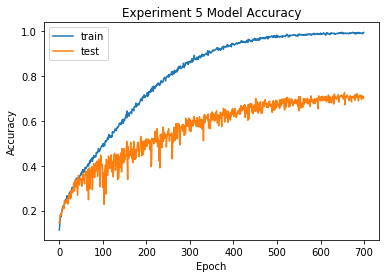

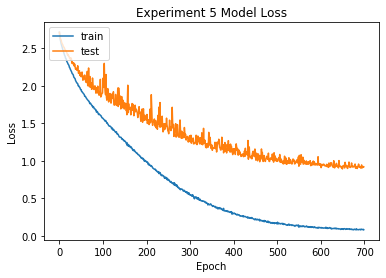

In [0]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Experiment 5 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Experiment 5 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Saving the model.json

import json
model_json = model.to_json()
with open("experiment_5_model_json.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('experiment_5_model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("./saved_models/Experiment_5_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 70.97%


In [0]:
len(data3_df)

240

In [0]:
data3_df.head()

path source actor gender intensity  \
0  ./RAVDESS/Actor_21/03-01-04-01-01-01-21.wav      1    21   male         0   
1  ./RAVDESS/Actor_21/03-01-05-02-02-01-21.wav      1    21   male         1   
2  ./RAVDESS/Actor_21/03-01-06-02-01-02-21.wav      1    21   male         1   
3  ./RAVDESS/Actor_21/03-01-05-02-01-02-21.wav      1    21   male         1   
4  ./RAVDESS/Actor_21/03-01-05-01-02-01-21.wav      1    21   male         0   

  statement repetition emotion         label  
0         0          0       4      male_sad  
1         1          0       5    male_angry  
2         0          1       6  male_fearful  
3         0          1       5    male_angry  
4         1          0       5    male_angry

In [0]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 240/240 [00:14<00:00, 16.30it/s]


In [0]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

240/240 [==============================] - 0s 2ms/step


In [0]:
preds

array([[3.0842977e-05, 3.8080507e-05, 2.9988369e-04, ..., 1.6876167e-02,
        5.4351506e-03, 2.4606060e-02],
       [4.0956683e-02, 8.9627457e-07, 3.2169750e-04, ..., 1.3101639e-04,
        3.2533935e-04, 3.8803718e-03],
       [9.1405241e-03, 4.0867736e-04, 8.4304746e-04, ..., 2.9067406e-02,
        9.3415216e-02, 1.5357861e-01],
       ...,
       [2.5686793e-04, 6.2882978e-01, 5.6472700e-02, ..., 5.2473741e-03,
        3.8200136e-02, 6.2902283e-04],
       [2.4085045e-01, 9.2818225e-03, 9.2755541e-02, ..., 1.0005037e-04,
        1.2099562e-03, 1.1845501e-04],
       [9.7002443e-03, 4.7807696e-01, 3.5796919e-01, ..., 4.4292139e-04,
        3.0974627e-03, 5.6699291e-04]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [0]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform(abc))
preddf = pd.DataFrame({'predictedvalues': predictions})
print(preddf[:10])

actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})
print(actualdf[:10])
finaldf = actualdf.join(preddf)
finaldf[20:40]

  predictedvalues
0    male_disgust
1      male_angry
2    male_fearful
3      male_angry
4      male_angry
5    male_disgust
6    female_angry
7      male_angry
8      male_angry
9      male_happy
     actualvalues
0        male_sad
1      male_angry
2    male_fearful
3      male_angry
4      male_angry
5    male_fearful
6  male_surprised
7      male_happy
8    male_disgust
9  male_surprised


actualvalues predictedvalues
20    male_neutral    male_disgust
21      male_happy      male_angry
22       male_calm    male_disgust
23      male_happy    male_disgust
24      male_happy      male_angry
25       male_calm    male_disgust
26      male_angry      male_angry
27        male_sad      male_happy
28      male_happy    male_disgust
29    male_disgust    male_disgust
30    male_disgust    male_disgust
31    male_fearful  male_surprised
32      male_happy      male_angry
33    male_disgust    male_disgust
34        male_sad    male_disgust
35    male_disgust    male_disgust
36    male_neutral    male_disgust
37      male_angry      male_angry
38  male_surprised    female_angry
39    male_neutral       male_calm

In [0]:
finaldf.groupby('actualvalues').count()

predictedvalues
actualvalues                     
female_angry                   16
female_calm                    16
female_disgust                 16
female_fearful                 16
female_happy                   16
female_neutral                  8
female_sad                     16
female_surprised               16
male_angry                     16
male_calm                      16
male_disgust                   16
male_fearful                   16
male_happy                     16
male_neutral                    8
male_sad                       16
male_surprised                 16

In [0]:
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues               
female_angry                48
female_calm                 21
female_disgust              22
female_fearful               5
female_happy                 9
female_neutral              13
female_sad                  24
female_surprised            10
male_angry                  17
male_calm                    7
male_disgust                38
male_fearful                 2
male_happy                  10
male_neutral                 2
male_sad                     5
male_surprised               7

In [0]:
finaldf.to_csv('Predictions_Experiment_5.csv', index=False)

In [0]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
print(accuracy_score(y_true, y_pred)*100)

28.749999999999996


0.2875
                  precision    recall  f1-score   support

    female_angry       0.10      0.31      0.16        16
     female_calm       0.43      0.56      0.49        16
  female_disgust       0.32      0.44      0.37        16
  female_fearful       0.80      0.25      0.38        16
    female_happy       0.33      0.19      0.24        16
  female_neutral       0.23      0.38      0.29         8
      female_sad       0.25      0.38      0.30        16
female_surprised       0.70      0.44      0.54        16
      male_angry       0.47      0.50      0.48        16
       male_calm       0.00      0.00      0.00        16
    male_disgust       0.34      0.81      0.48        16
    male_fearful       1.00      0.12      0.22        16
      male_happy       0.20      0.12      0.15        16
    male_neutral       0.00      0.00      0.00         8
        male_sad       0.00      0.00      0.00        16
  male_surprised       0.00      0.00      0.00        16

     

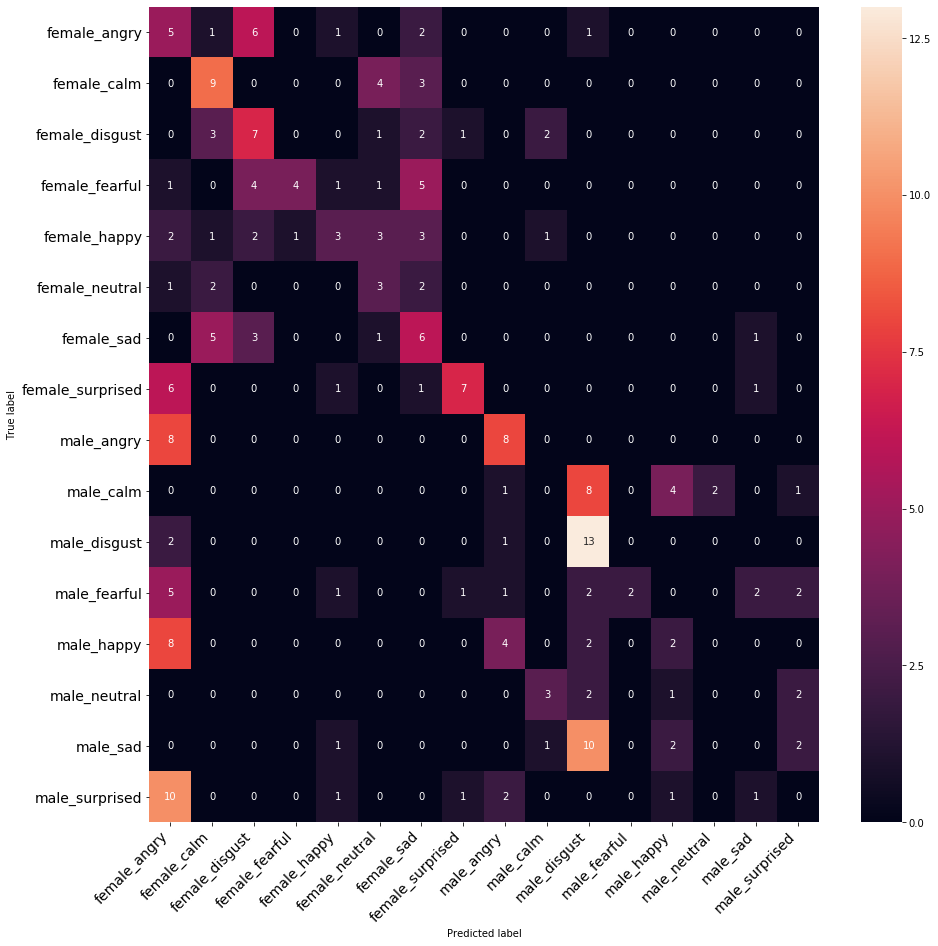

In [0]:
classes = finaldf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

### We had not expected such poor results

#### Anyway, let's check for gender and emotions

In [0]:
classes

array(['female_angry', 'female_calm', 'female_disgust', 'female_fearful',
       'female_happy', 'female_neutral', 'female_sad', 'female_surprised',
       'male_angry', 'male_calm', 'male_disgust', 'male_fearful',
       'male_happy', 'male_neutral', 'male_sad', 'male_surprised'],
      dtype=object)

#### Let's group the gender and check for the results for the combined data

Accuracy is:  0.8166666666666667
              precision    recall  f1-score   support

      female       0.75      0.95      0.84       120
        male       0.93      0.68      0.79       120

    accuracy                           0.82       240
   macro avg       0.84      0.82      0.81       240
weighted avg       0.84      0.82      0.81       240



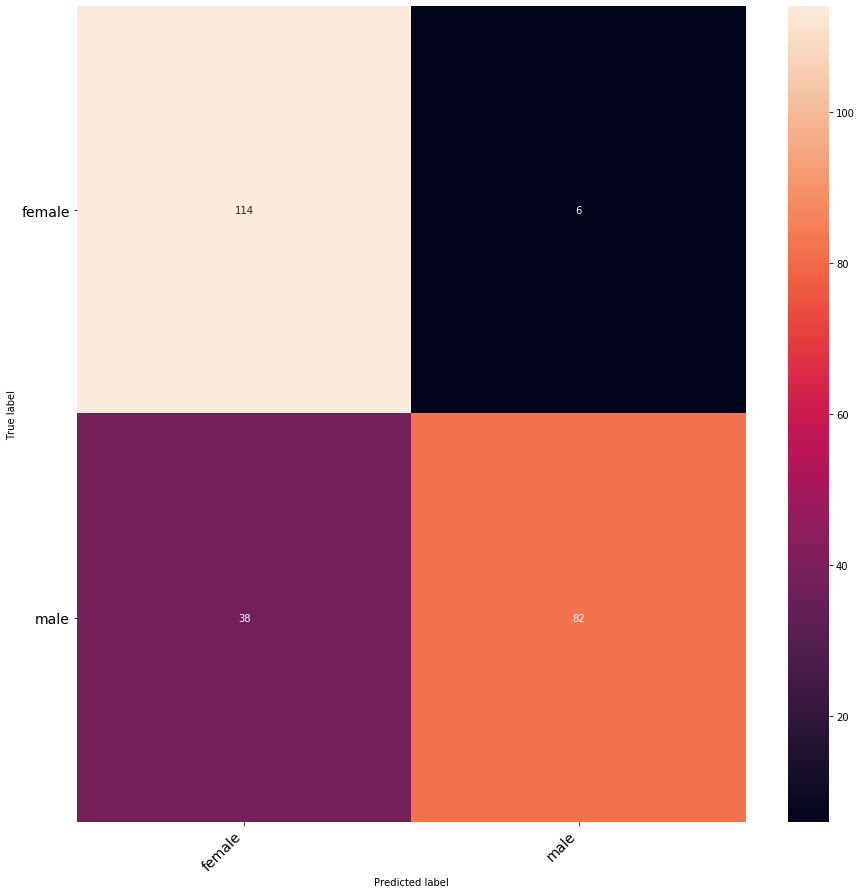

In [0]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fearful':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprised':'female'
                                       , 'female_calm':'female'
                                       , 'female_neutral':'female'              
                                       , 'male_angry':'male'
                                       , 'male_fearful':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprised':'male'
                                       , 'male_calm':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fearful':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprised':'female'
                                       , 'female_calm':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_neutral':'male'
                                       , 'male_fearful':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprised':'male'
                                       , 'male_calm':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print("Accuracy is: ",accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

## Let's group together the emotions and look for the performance for the combined data

Accuracy is:  0.32916666666666666
              precision    recall  f1-score   support

       angry       0.32      0.66      0.43        32
        calm       0.32      0.28      0.30        32
     disgust       0.33      0.62      0.43        32
     fearful       0.86      0.19      0.31        32
       happy       0.26      0.16      0.20        32
     neutral       0.20      0.19      0.19        16
         sad       0.24      0.22      0.23        32
   surprised       0.47      0.25      0.33        32

    accuracy                           0.33       240
   macro avg       0.38      0.32      0.30       240
weighted avg       0.39      0.33      0.31       240



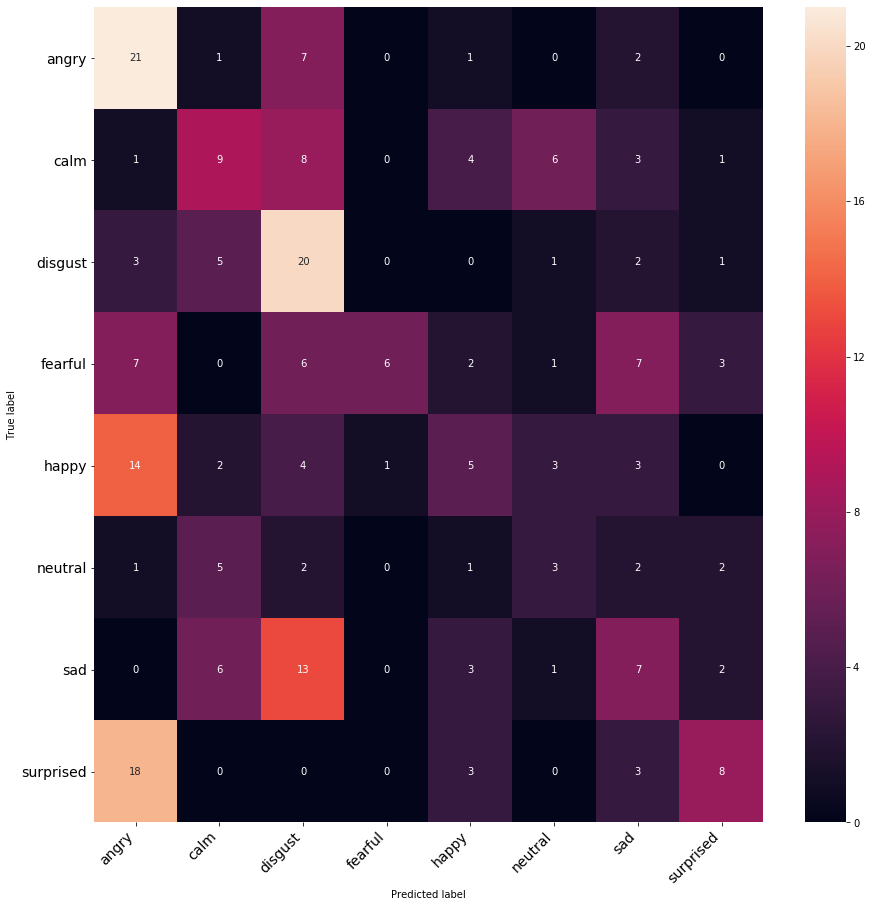

In [0]:
modidf = pd.read_csv("Predictions_Experiment_5.csv")
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fearful':'fearful'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprised':'surprised'
                                       , 'female_calm':'calm'
                                       , 'female_neutral':'neutral'              
                                       , 'male_angry':'angry'
                                       , 'male_neutral':'neutral'
                                       , 'male_fearful':'fearful'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprised':'surprised'
                                       , 'male_calm':'calm'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fearful':'fearful'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprised':'surprised'
                                       , 'female_calm':'calm'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_neutral':'neutral'
                                       , 'male_fearful':'fearful'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprised':'surprised'
                                       , 'male_calm':'calm'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print("Accuracy is: ",accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

# Experiment 6: Experiments with 2D CNN Architecture

Back to [Experiments and Results](#Experiments-and-Results)

In [0]:
i = 0

In [0]:
def speedNpitch(data):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        if aug == 1:
            data = speedNpitch(data)
        
        if mfcc == 1:
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X

  
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
        bottom, top = heatmap.get_ylim()
        heatmap.set_ylim(bottom + 0.5, top - 0.5)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
def get_2d_conv_model(n):
    global i
    i = i + 1
    nclass = 14
    inp = Input(shape=(n,216,1))  
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    model.summary()
    tf.keras.utils.plot_model(model, to_file='model_'+str(i)+'.png', show_shapes=True, show_layer_names=True)
    return model

class get_results:
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        plt.plot(model_history.history['acc'])
        plt.plot(model_history.history['val_acc'])
        plt.title('Model Accuracy')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        plt.show()
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        plt.show()

    def create_results(self, model):
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def print_classification_report(self, X_test, y_test, labels, model):
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    
        print(classification_report(actual, preds, target_names=classes))
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds = preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

## We will use the Data_combined.csv file that we have created earlier

In [0]:
ref = pd.read_csv("./Data_combined.csv")
ref.head()

labels source                      path
0   male_fear  SAVEE   ./SAVEE_used/KL_f04.wav
1  male_angry  SAVEE   ./SAVEE_used/KL_a11.wav
2   male_fear  SAVEE   ./SAVEE_used/JE_f11.wav
3    male_sad  SAVEE  ./SAVEE_used/DC_sa11.wav
4   male_fear  SAVEE   ./SAVEE_used/KL_f08.wav

In [0]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(ref, n = n_mfcc, aug = 0, mfcc = 1)

100%|██████████| 4720/4720 [03:29<00:00, 22.58it/s]


In [0]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, epochs=20)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 216, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 216, 32)       1312      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 216, 32)       128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 216, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 108, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 108, 32)       0         
___________________________________________

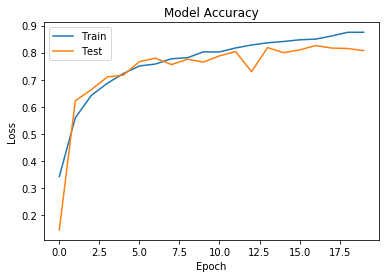

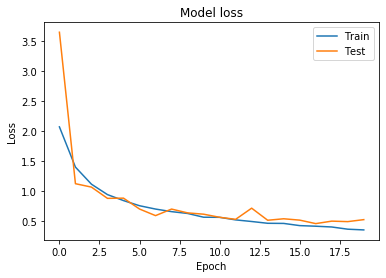

accuracy: 80.76%
                 precision    recall  f1-score   support

   female_angry       0.93      0.93      0.93       125
 female_disgust       0.88      0.97      0.93       134
    female_fear       0.99      0.86      0.92       129
   female_happy       0.90      0.91      0.90       122
 female_neutral       0.94      0.96      0.95       125
     female_sad       0.96      0.87      0.92       111
female_surprise       0.86      0.98      0.92       115
     male_angry       0.54      0.77      0.63        52
   male_disgust       0.28      0.59      0.38        32
      male_fear       0.50      0.23      0.32        47
     male_happy       0.44      0.48      0.46        44
   male_neutral       0.88      0.54      0.67        68
       male_sad       0.44      0.20      0.27        35
  male_surprise       0.48      0.49      0.48        41

       accuracy                           0.81      1180
      macro avg       0.72      0.70      0.69      1180
   weighted 

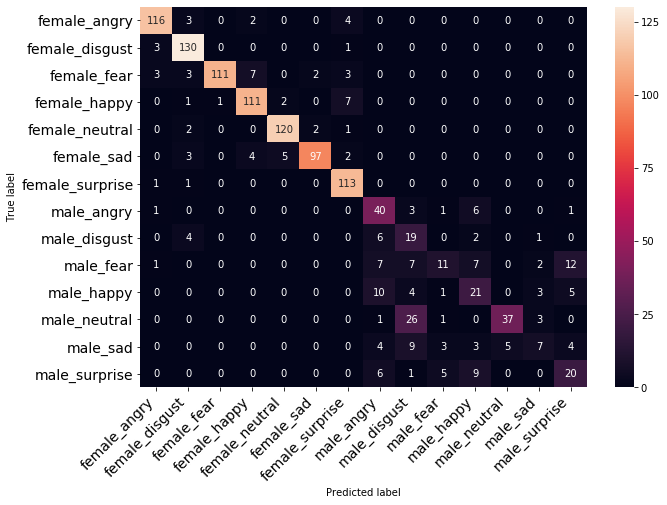

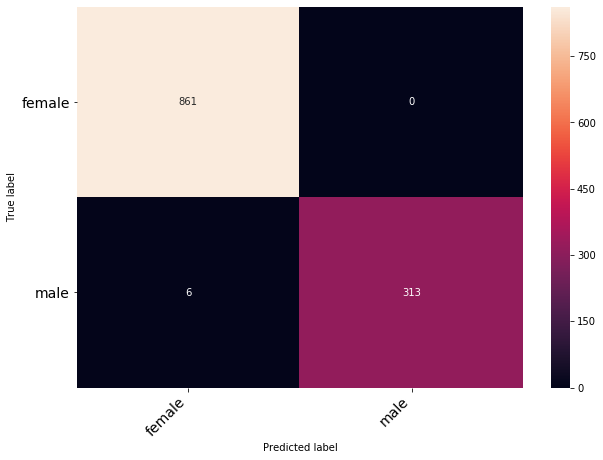

In [0]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)
results.print_classification_report(X_test, y_test, ref.labels.unique(), model)
results.accuracy_results_gender(X_test, y_test, ref.labels.unique(), model)

In [0]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc_aug = prepare_data(ref, n = n_mfcc, aug = 1, mfcc = 1)

100%|██████████| 4720/4720 [02:17<00:00, 34.24it/s]


In [0]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc_aug
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train - mean)/std
# X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, epochs=20)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30, 216, 1)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 216, 32)       1312      
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 216, 32)       128       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 216, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 108, 32)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 108, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 108, 32)       4099

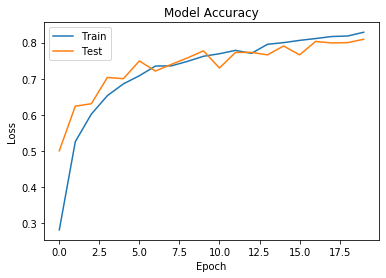

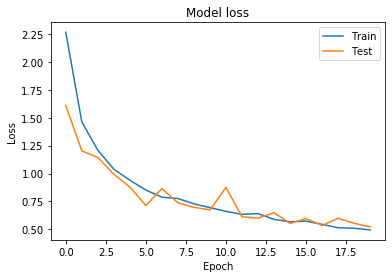

accuracy: 80.93%
                 precision    recall  f1-score   support

   female_angry       0.94      0.92      0.93       125
 female_disgust       0.95      0.90      0.93       134
    female_fear       0.98      0.94      0.96       129
   female_happy       0.95      0.84      0.90       122
 female_neutral       0.92      0.93      0.92       125
     female_sad       0.84      0.93      0.88       111
female_surprise       0.88      0.98      0.93       115
     male_angry       0.71      0.65      0.68        52
   male_disgust       0.48      0.38      0.42        32
      male_fear       0.71      0.26      0.37        47
     male_happy       0.33      0.09      0.14        44
   male_neutral       0.52      0.97      0.67        68
       male_sad       0.32      0.34      0.33        35
  male_surprise       0.43      0.56      0.48        41

       accuracy                           0.81      1180
      macro avg       0.71      0.69      0.68      1180
   weighted 

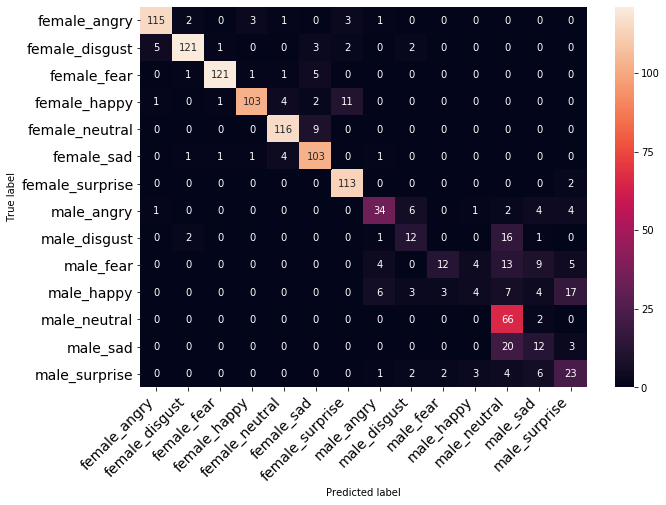

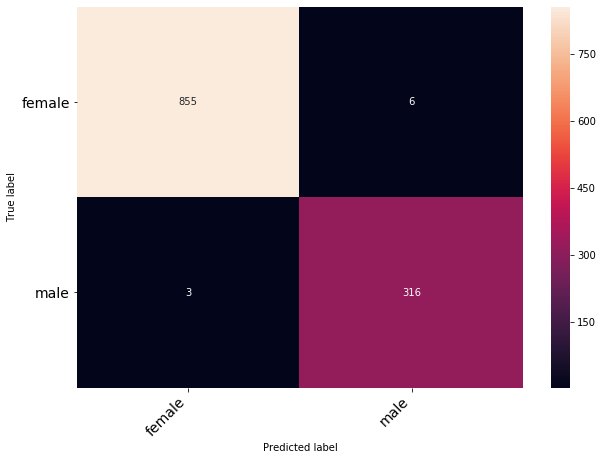

In [0]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)
results.print_classification_report(X_test, y_test, ref.labels.unique(), model)
results.accuracy_results_gender(X_test, y_test, ref.labels.unique(), model)

In [0]:
sampling_rate=44100
audio_duration=2.5
n_melspec = 60
specgram = prepare_data(ref, n = n_melspec, aug = 0, mfcc = 0)

100%|██████████| 4720/4720 [02:52<00:00, 27.38it/s]


In [0]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(specgram
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_melspec)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, epochs=20)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 60, 216, 1)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 216, 32)       1312      
_________________________________________________________________
batch_normalization_11 (Batc (None, 60, 216, 32)       128       
_________________________________________________________________
activation_11 (Activation)   (None, 60, 216, 32)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 108, 32)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 108, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 108, 32)       4099

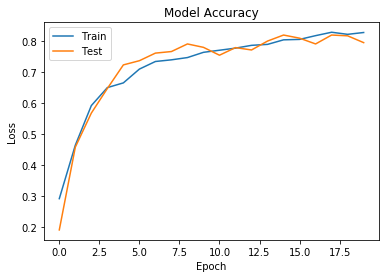

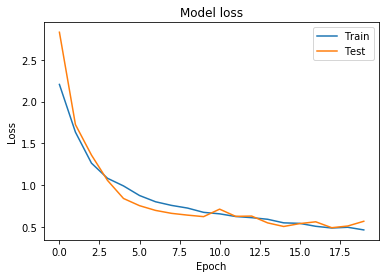

accuracy: 79.58%
                 precision    recall  f1-score   support

   female_angry       0.95      0.91      0.93       125
 female_disgust       0.94      0.96      0.95       134
    female_fear       0.98      0.90      0.94       129
   female_happy       0.87      0.84      0.85       122
 female_neutral       0.96      0.82      0.88       125
     female_sad       0.92      0.88      0.90       111
female_surprise       0.79      0.99      0.88       115
     male_angry       0.81      0.58      0.67        52
   male_disgust       0.35      0.38      0.36        32
      male_fear       0.50      0.17      0.25        47
     male_happy       0.34      0.50      0.40        44
   male_neutral       0.47      0.96      0.63        68
       male_sad       0.62      0.29      0.39        35
  male_surprise       0.71      0.41      0.52        41

       accuracy                           0.80      1180
      macro avg       0.73      0.68      0.68      1180
   weighted 

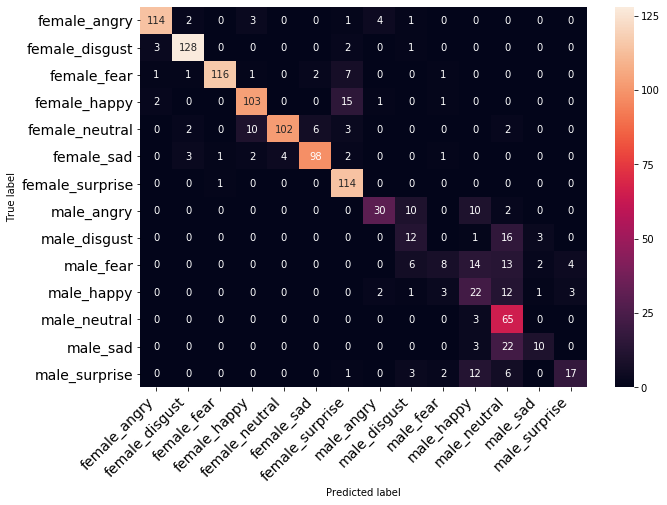

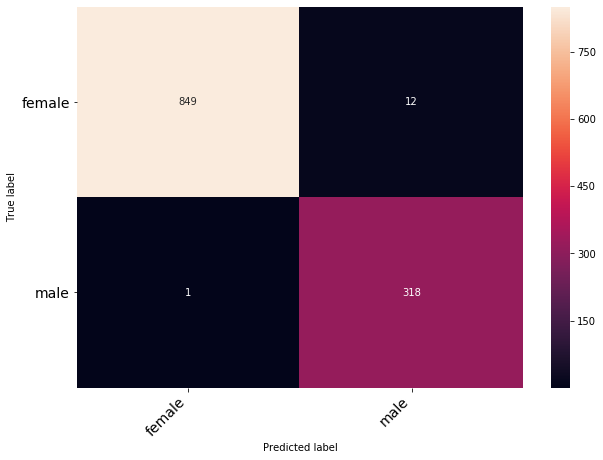

In [0]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)
results.print_classification_report(X_test, y_test, ref.labels.unique(), model)
results.accuracy_results_gender(X_test, y_test, ref.labels.unique(), model)

In [0]:
sampling_rate=44100
audio_duration=2.5
n_melspec = 60
aug_specgram = prepare_data(ref,  n = n_melspec, aug = 1, mfcc = 0)

100%|██████████| 4720/4720 [03:20<00:00, 23.57it/s]


In [0]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(aug_specgram
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_melspec)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, epochs=20)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 60, 216, 1)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 216, 32)       1312      
_________________________________________________________________
batch_normalization_16 (Batc (None, 60, 216, 32)       128       
_________________________________________________________________
activation_16 (Activation)   (None, 60, 216, 32)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 108, 32)       0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 30, 108, 32)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 108, 32)       4099

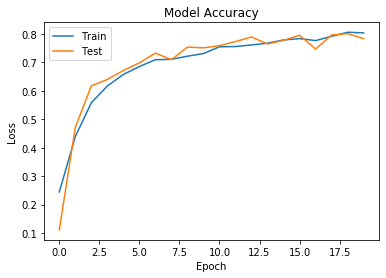

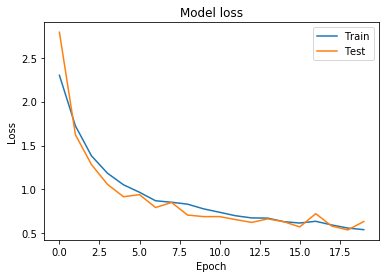

accuracy: 78.31%
                 precision    recall  f1-score   support

   female_angry       0.98      0.84      0.91       125
 female_disgust       0.95      0.94      0.94       134
    female_fear       0.95      0.89      0.92       129
   female_happy       0.86      0.93      0.90       122
 female_neutral       0.91      0.96      0.93       125
     female_sad       0.99      0.78      0.87       111
female_surprise       0.97      0.97      0.97       115
     male_angry       0.59      0.62      0.60        52
   male_disgust       0.20      0.47      0.28        32
      male_fear       0.44      0.17      0.25        47
     male_happy       0.35      0.27      0.31        44
   male_neutral       0.46      0.99      0.62        68
       male_sad       0.00      0.00      0.00        35
  male_surprise       0.67      0.29      0.41        41

       accuracy                           0.78      1180
      macro avg       0.67      0.65      0.64      1180
   weighted 

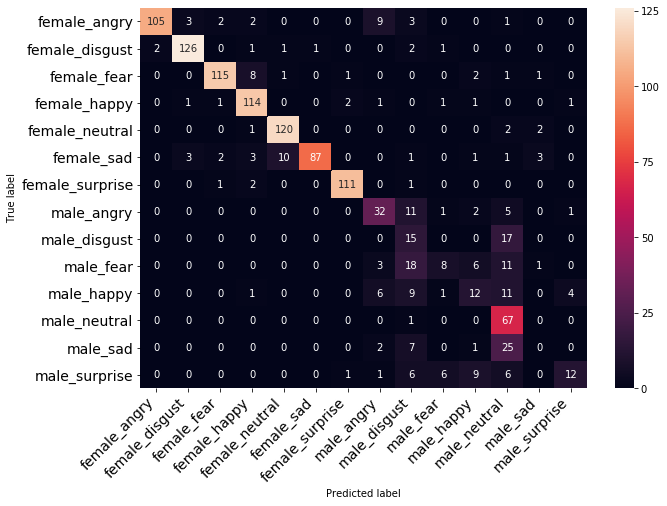

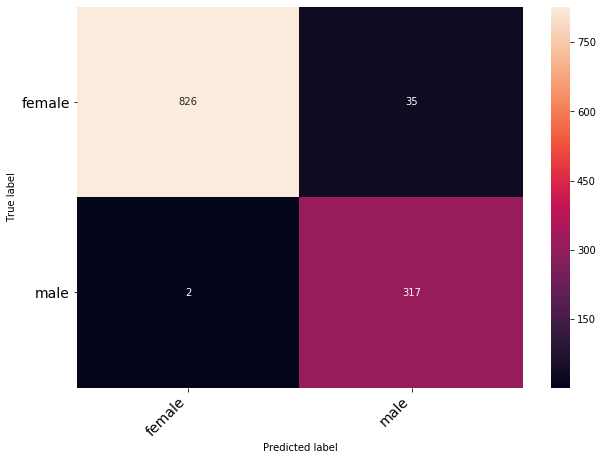

In [0]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)
results.print_classification_report(X_test, y_test, ref.labels.unique(), model)
results.accuracy_results_gender(X_test, y_test, ref.labels.unique(), model)

Back to [Top](#Emotion-Recognition-Using-Speech)

Back to [Table of Contents](#Table-of-Contents)

Back to [Experiments and Results](#Experiments-and-Results)